In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_around_onset_combined_FIGURES_matrix'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'add_2way_sig', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'add_significance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'sig_vs_chance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [5]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [7]:
import matplotlib.lines
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001)):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = pl.Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

In [8]:
def sig_vs_chance(ax, array1, chance, x1, y1, loops=15, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),colors='k'):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    ax.text(x1, y1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=5, color=colors)
    return sig_value, p

In [9]:
def add_2way_sig(ax, sess, epoch, x, y, thresholds=(0.05, 0.01, 0.001)):
    p_reg = eval("%s_%s_pvals['region'][0]"%(epoch,sess))
    p_per = eval("%s_%s_pvals['period'][0]"%(epoch,sess))
    p_interac = eval("%s_%s_pvals['interaction'][0]"%(epoch,sess))
    for tex,i,ps in zip(('region','period','r X p   '),(8,4,0),(p_reg,p_per,p_interac)):
        ax.text(x, y+i, tex+': '+
            ('n.s.' if ps>thresholds[0] else
            '*' if ps>thresholds[1] else
            '**' if ps>thresholds[2] else
            '***'),
            ha='left', fontsize=3.5)
    return p

In [10]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [9]:
all_animals_vhpc =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
pre_animals_vhpc =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_animals_vhpc =    'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
pre_rev_animals_vhpc = 'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_rev_animals_vhpc ='c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
catch_animals_vhpc =   'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'

In [10]:
all_animals_dhpc =      'dhpcg1','dhpcg20','dhpc24'
pre_animals_dhpc =      'dhpcg1','dhpcg20','dhpc24'
post_animals_dhpc =     'dhpcg1','dhpcg20','dhpc24'
pre_rev_animals_dhpc =  'dhpcg1','dhpcg20','dhpc24'
post_rev_animals_dhpc = 'dhpcg1','dhpcg20','dhpc24'
catch_animals_dhpc =    'dhpcg1','dhpcg20'

In [11]:
sessions = 'pre','d2','post','pre_rev','post_rev','catch'
session_labels = 'Early','Day2','Late','Rev Early','Rev Late','Rev Catch'
session_colors = 'maroon','maroon','maroon','midnightblue','midnightblue','midnightblue'

all_labels='rwVSsh','rwVScsm','shVScsm','rwndVSshnd','rwVSrwnd','rwndVScsm','shVSshnd','shndVScsm'
non_catch_labels = 'rwVSsh','rwVScsm','shVScsm'
catch_labels = 'rwndVSshnd','rwVSrwnd','rwndVScsm','shVSshnd','shndVScsm'

In [18]:
for label in all_labels:
    for r in 'dhpc','vhpc':
        #exec("distinct_%s = {}"%r)
        exec("distinct_%s_%s = ut.load_variable('distinct_%s',\
            '../notebooks/autorestore/decoding_around_onset_combined_1sec_%s/')"%(label,r,label,r,))
        exec("distinct_wilcox_%s_%s = ut.load_variable('distinct_wilcox_%s',\
            '../notebooks/autorestore/decoding_around_onset_combined_1sec_%s/')"%(label,r,label,r))

In [19]:
for label in all_labels:
    for r in 'dhpc','vhpc':
        #exec("distinct_%s = {}"%r)
        exec("distinct_mean_%s_%s = ut.load_variable('distinct_mean_%s',\
            '../notebooks/autorestore/decoding_around_onset_combined_1sec_%s/')"%(label,r,label,r,))
        exec("distinct_mean_wilcox_%s_%s = ut.load_variable('distinct_mean_wilcox_%s',\
            '../notebooks/autorestore/decoding_around_onset_combined_1sec_%s/')"%(label,r,label,r))

In [12]:
for label in all_labels:
    for r in 'dhpc','vhpc':
        #exec("distinct_%s = {}"%r)
        exec("subset_%s_%s = ut.load_variable('subset_%s',\
            '../notebooks/autorestore/decoding_around_onset_combined_1sec_%s/')"%(label,r,label,r,))
        exec("subset_wilcox_%s_%s = ut.load_variable('subset_wilcox_%s',\
            '../notebooks/autorestore/decoding_around_onset_combined_1sec_%s/')"%(label,r,label,r))

In [140]:
import matplotlib.patches as patches

fig, ax = pl.subplots(3, 6, figsize=(12, 6.5))#, sharex=True, sharey=True)

for label,c,mm,cmap,lab in zip(non_catch_labels,range(3),([.5,1],[.5,1],[.5,1]),['afmhot','afmhot','afmhot'],['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
    for sess,x in zip(sessions,range(len(sessions))):
        im = ax[c][x].pcolormesh(eval("distinct_%s_dhpc[sess]"%label),vmin=mm[0],vmax=mm[1],cmap=cmap)
        ax[c][x].set_xticks(np.arange(1,14,2))
        ax[c][x].set_yticks(np.arange(1,14,2))
        #ax[c][x].set_ylim(-.5, 12.5)
        #ax[c][x].set_xlim(-.5, 12.5)
        ax[c][x].set_xticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][x].set_yticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][0].set_ylabel(lab+'\nTime from CS onset (s)', fontsize=9)
        ax[2][x].set_xlabel('Time from CS onset (s)', fontsize=9)
        ax[2][x].text(x=3.8,y=-5,s='Test on', fontsize=14,color='mediumslateblue')
        ax[c][0].text(x=-7.5,y=8.8,s='Train on', fontsize=14,color='mediumslateblue',rotation=90)
        ax[c][x].set_title(session_labels[x],fontsize=11,color=session_colors[x])
        ax[c][x].tick_params(length=3)
# Add the patch to the Axes
for x in range(6):
    for c in range(3):
        CS = patches.Rectangle((3,3),2,2,linewidth=2,edgecolor='lightgrey',facecolor='none')
        Tr = patches.Rectangle((5,5),2,2,linewidth=2.5,edgecolor='lightgrey',facecolor='none',linestyle=':')
        ax[c][x].add_patch(CS)
        ax[c][x].add_patch(Tr)
        ax[c][x].text(3.2,3.6,"CS",fontsize=10, weight='bold', color='k')
        ax[c][x].text(5.3,5.6,"Tr",fontsize=10, weight='bold', color='k')
        ax[c][x].text(7.2,7.4,"US",fontsize=10, weight='bold', color='k')

pl.suptitle('dCA1 Decoding Performance',y=1.03,fontsize=13)
fig.text(x=.22,y=-0.06,s='Pre Reversal',fontsize=19, color='maroon')
fig.text(x=.689,y=-0.06,s='Post Reversal',fontsize=19, color='midnightblue')

cax = fig.add_axes([1.03,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='Decoding perf. (%)')
fig.tight_layout(pad=2)
fig.savefig('../figures/%s_gmin_across_bins_d.pdf'%NOTEBOOK_NAME)

In [141]:
import matplotlib.patches as patches

fig, ax = pl.subplots(3, 6, figsize=(12, 6.5))#, sharex=True, sharey=True)

for label,c,mm,cmap,lab in zip(non_catch_labels,range(3),([.5,1],[.5,1],[.5,1]),['afmhot','afmhot','afmhot'],['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
    for sess,x in zip(sessions,range(len(sessions))):
        im = ax[c][x].pcolormesh(eval("distinct_%s_vhpc[sess]"%label),vmin=mm[0],vmax=mm[1],cmap=cmap)
        ax[c][x].set_xticks(np.arange(1,14,2))
        ax[c][x].set_yticks(np.arange(1,14,2))
        #ax[c][x].set_ylim(-.5, 12.5)
        #ax[c][x].set_xlim(-.5, 12.5)
        ax[c][x].set_xticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][x].set_yticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][0].set_ylabel(lab+'\nTime from CS onset (s)', fontsize=9)
        ax[2][x].set_xlabel('Time from CS onset (s)', fontsize=9)
        ax[2][x].text(x=3.8,y=-5,s='Test on', fontsize=14,color='mediumslateblue')
        ax[c][0].text(x=-7.5,y=8.8,s='Train on', fontsize=14,color='mediumslateblue',rotation=90)
        ax[c][x].set_title(session_labels[x],fontsize=11,color=session_colors[x])
        ax[c][x].tick_params(length=3)
# Add the patch to the Axes
for x in range(6):
    for c in range(3):
        CS = patches.Rectangle((3,3),2,2,linewidth=2,edgecolor='lightgrey',facecolor='none')
        Tr = patches.Rectangle((5,5),2,2,linewidth=2.5,edgecolor='lightgrey',facecolor='none',linestyle=':')
        ax[c][x].add_patch(CS)
        ax[c][x].add_patch(Tr)
        ax[c][x].text(3.2,3.6,"CS",fontsize=10, weight='bold', color='k')
        ax[c][x].text(5.3,5.6,"Tr",fontsize=10, weight='bold', color='k')
        ax[c][x].text(7.2,7.4,"US",fontsize=10, weight='bold', color='k')

pl.suptitle('vCA1 Decoding Performance',y=1.03,fontsize=13)

fig.text(x=.22,y=-0.06,s='Pre Reversal',fontsize=19, color='maroon')
fig.text(x=.689,y=-0.06,s='Post Reversal',fontsize=19, color='midnightblue')

cax = fig.add_axes([1.03,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='Decoding perf. (%)')
fig.tight_layout(pad=2)
fig.savefig('../figures/%s_gmin_across_bins_v.pdf'%NOTEBOOK_NAME)

In [179]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#make unique colormap for emphasizing significant p-values
sigs = cm.get_cmap('BuPu', 15)
white = np.array([1, 1, 1, 1])
newcolors = np.vstack((sigs(np.linspace(1, 0, 15)),
                       sigs(np.linspace(0, 1, 241))))
#pink = np.array([.96, .09, .6, 1])
newcolors[15:, :] = white
newcmap = ListedColormap(newcolors)

vmin=0
vmax=1

fig, ax = pl.subplots(3, 6, figsize=(12, 6.5))#, sharex=True, sharey=True)

for label,c,lab in zip(non_catch_labels,range(3),['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
    for sess,x in zip(sessions,range(len(sessions))):
        im = ax[c][x].pcolormesh(eval("distinct_wilcox_%s_dhpc[sess]"%label),vmin=vmin,vmax=vmax,cmap=newcmap)
        ax[c][x].set_xticks(np.arange(1,14,2))
        ax[c][x].set_yticks(np.arange(1,14,2))
        #ax[c][x].set_ylim(-.5, 12.5)
        #ax[c][x].set_xlim(-.5, 12.5)
        ax[c][x].set_xticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][x].set_yticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][0].set_ylabel(lab+'\nTime from CS onset (s)', fontsize=9)
        ax[2][x].set_xlabel('Time from CS onset (s)', fontsize=9)
        ax[2][x].text(x=3.8,y=-5,s='Test on', fontsize=14,color='mediumslateblue')
        ax[c][0].text(x=-7.5,y=8.8,s='Train on', fontsize=14,color='mediumslateblue',rotation=90)
        ax[c][x].set_title(session_labels[x],fontsize=11,color=session_colors[x])
        ax[c][x].tick_params(length=3)
# Add the patch to the Axes
for x in range(6):
    for c in range(3):
        CS = patches.Rectangle((3,3),2,2,linewidth=2,edgecolor='lightgrey',facecolor='none')
        Tr = patches.Rectangle((5,5),2,2,linewidth=2.5,edgecolor='lightgrey',facecolor='none',linestyle=':')
        ax[c][x].add_patch(CS)
        ax[c][x].add_patch(Tr)
        ax[c][x].text(3.2,3.6,"CS",fontsize=10, weight='bold', color='w')
        ax[c][x].text(5.3,5.6,"Tr",fontsize=10, weight='bold', color='w')
        ax[c][x].text(7.2,7.4,"US",fontsize=10, weight='bold', color='w')

pl.suptitle('dCA1 Decoding Performance',y=1.03,fontsize=13)

fig.text(x=.22,y=-0.06,s='Pre Reversal',fontsize=19, color='maroon')
fig.text(x=.689,y=-0.06,s='Post Reversal',fontsize=19, color='midnightblue')

cax = fig.add_axes([1.03,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='Decoding perf. (%)')
fig.tight_layout(pad=2)
fig.savefig('../figures/%s_gmin_across_bins_wilcox_d.pdf'%NOTEBOOK_NAME)

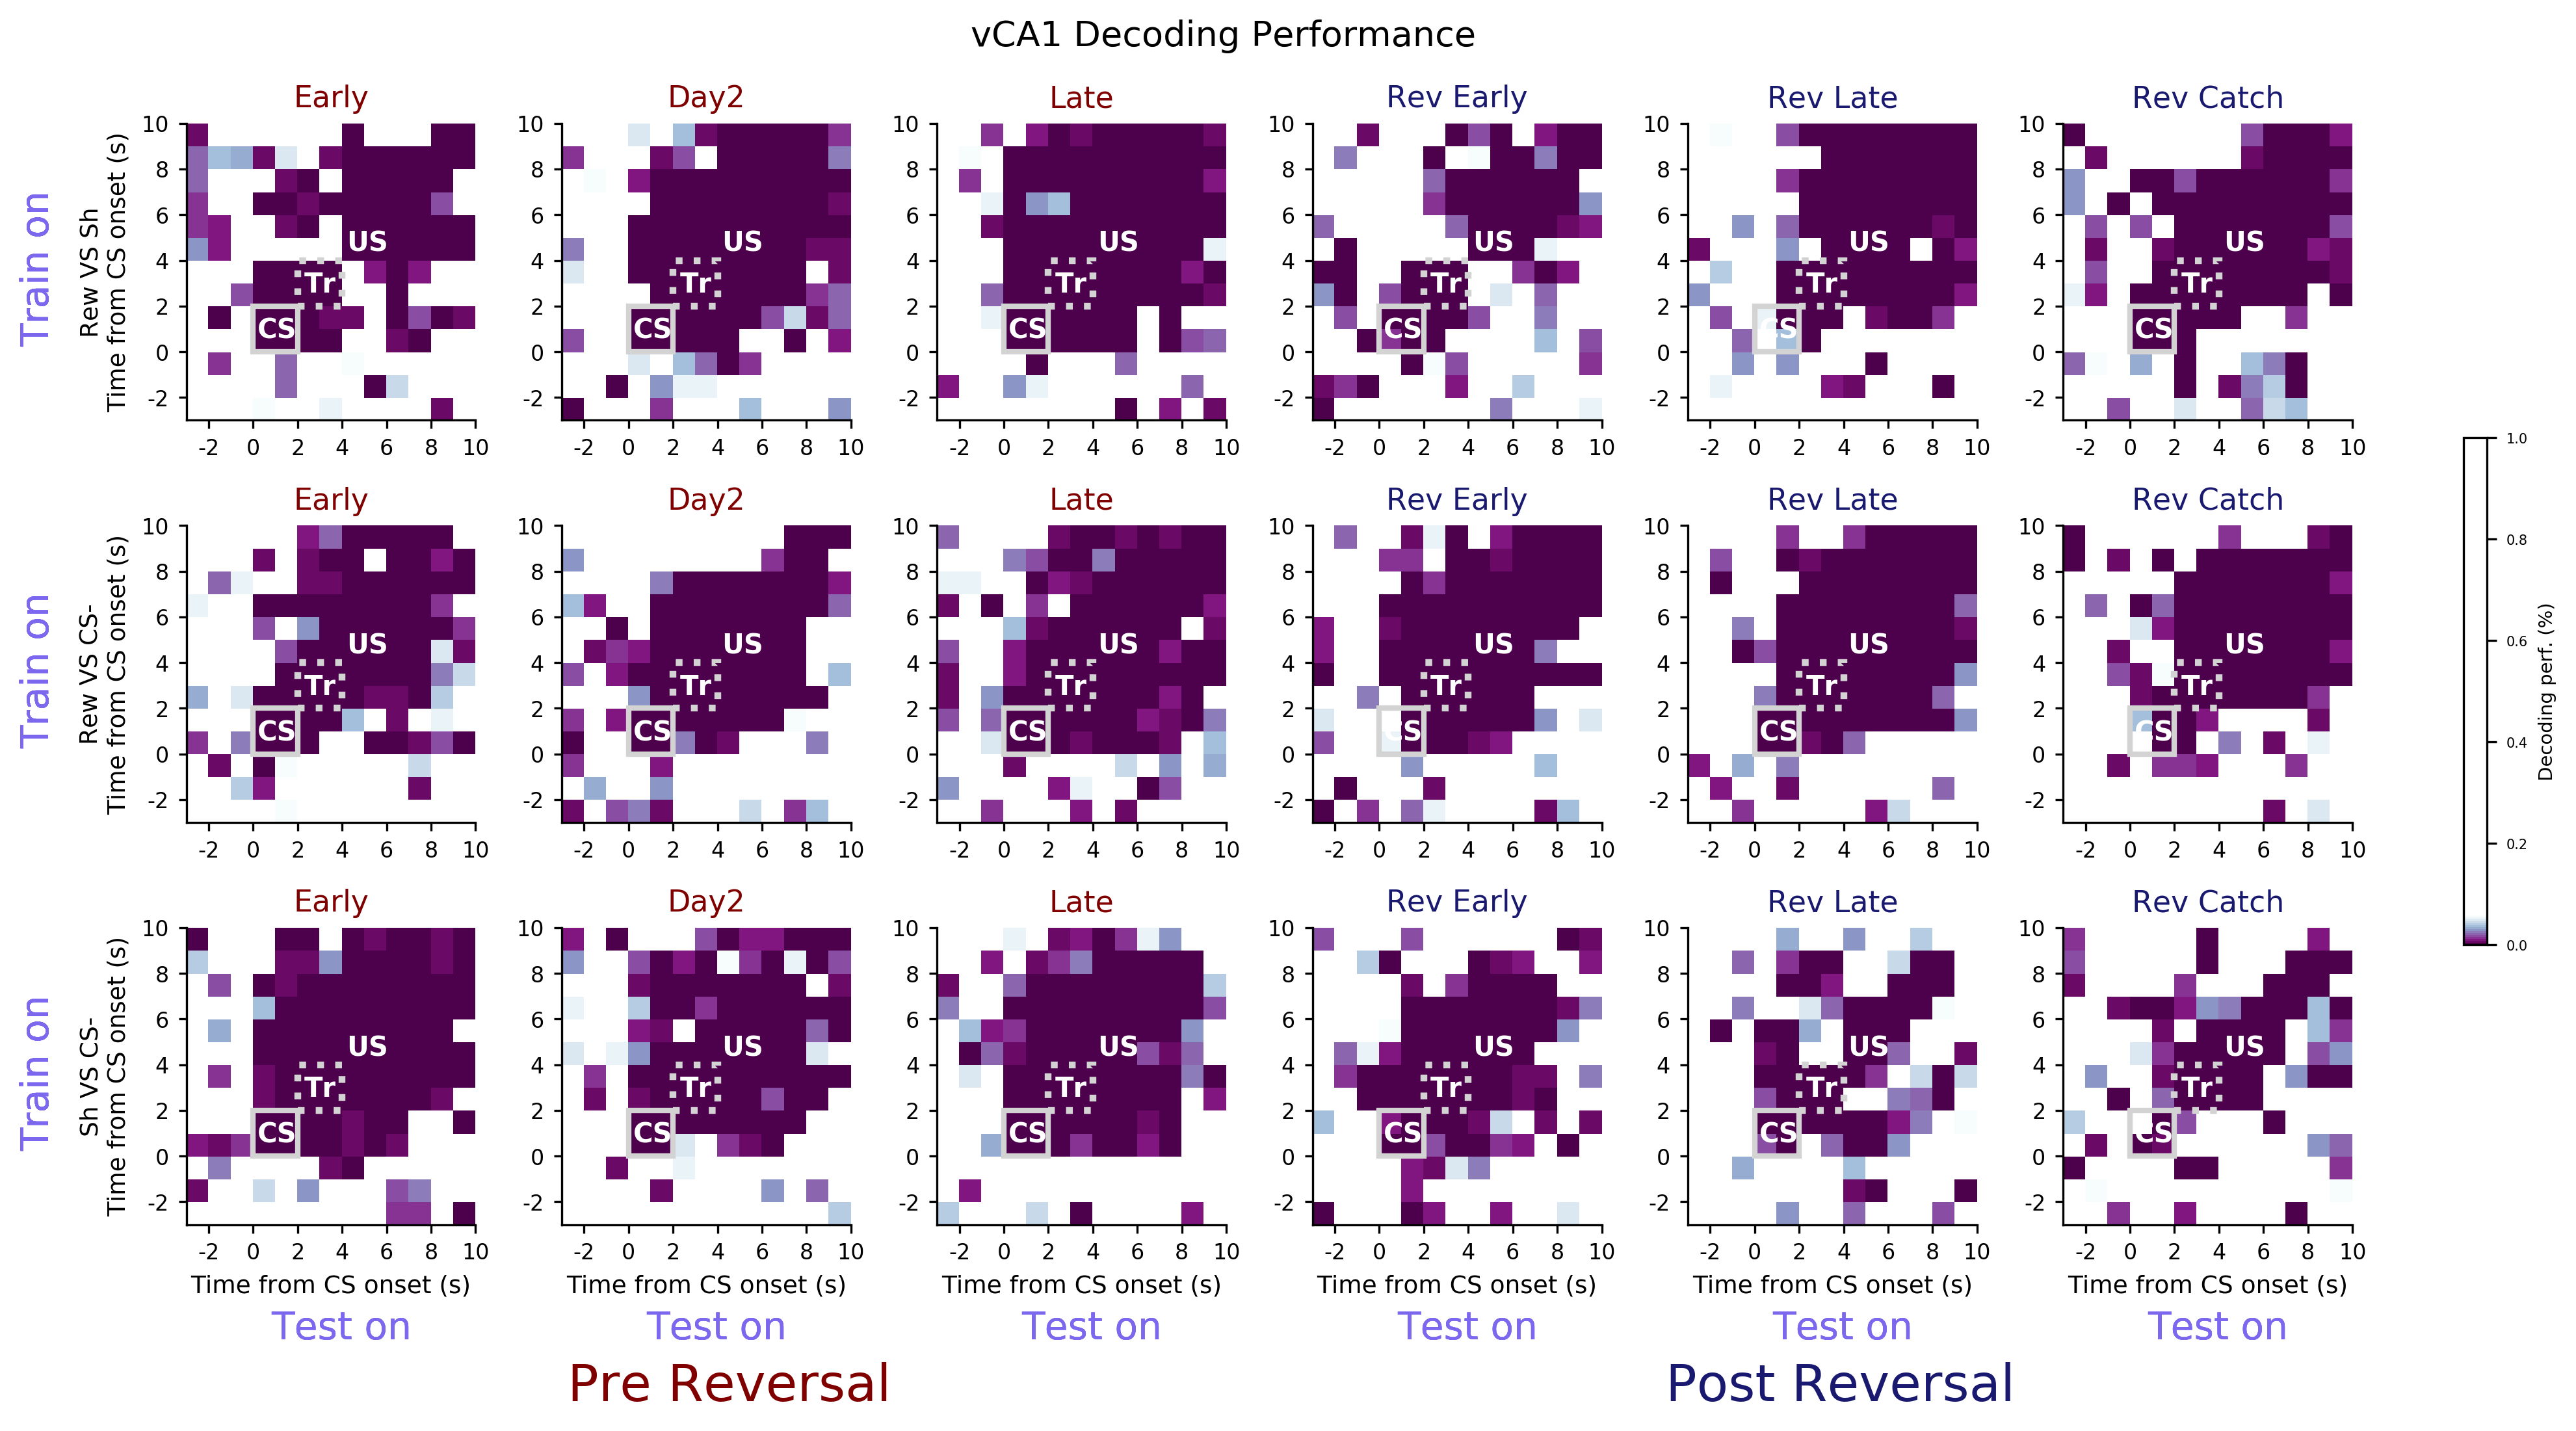

In [178]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#make unique colormap for emphasizing significant p-values
sigs = cm.get_cmap('BuPu', 15)
white = np.array([1, 1, 1, 1])
newcolors = np.vstack((sigs(np.linspace(1, 0, 15)),
                       sigs(np.linspace(0, 1, 241))))
#pink = np.array([.96, .09, .6, 1])
newcolors[15:, :] = white
newcmap = ListedColormap(newcolors)

vmin=0
vmax=1

fig, ax = pl.subplots(3, 6, figsize=(12, 6.5))#, sharex=True, sharey=True)

for label,c,lab in zip(non_catch_labels,range(3),['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
    for sess,x in zip(sessions,range(len(sessions))):
        im = ax[c][x].pcolormesh(eval("distinct_wilcox_%s_vhpc[sess]"%label),vmin=vmin,vmax=vmax,cmap=newcmap)
        ax[c][x].set_xticks(np.arange(1,14,2))
        ax[c][x].set_yticks(np.arange(1,14,2))
        #ax[c][x].set_ylim(-.5, 12.5)
        #ax[c][x].set_xlim(-.5, 12.5)
        ax[c][x].set_xticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][x].set_yticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][0].set_ylabel(lab+'\nTime from CS onset (s)', fontsize=9)
        ax[2][x].set_xlabel('Time from CS onset (s)', fontsize=9)
        ax[2][x].text(x=3.8,y=-5,s='Test on', fontsize=14,color='mediumslateblue')
        ax[c][0].text(x=-7.5,y=8.8,s='Train on', fontsize=14,color='mediumslateblue',rotation=90)
        ax[c][x].set_title(session_labels[x],fontsize=11,color=session_colors[x])
        ax[c][x].tick_params(length=3)
# Add the patch to the Axes
for x in range(6):
    for c in range(3):
        CS = patches.Rectangle((3,3),2,2,linewidth=2,edgecolor='lightgrey',facecolor='none')
        Tr = patches.Rectangle((5,5),2,2,linewidth=2.5,edgecolor='lightgrey',facecolor='none',linestyle=':')
        ax[c][x].add_patch(CS)
        ax[c][x].add_patch(Tr)
        ax[c][x].text(3.2,3.6,"CS",fontsize=10, weight='bold', color='w')
        ax[c][x].text(5.3,5.6,"Tr",fontsize=10, weight='bold', color='w')
        ax[c][x].text(7.2,7.4,"US",fontsize=10, weight='bold', color='w')

pl.suptitle('vCA1 Decoding Performance',y=1.03,fontsize=13)
fig.text(x=.22,y=-0.06,s='Pre Reversal',fontsize=19, color='maroon')
fig.text(x=.689,y=-0.06,s='Post Reversal',fontsize=19, color='midnightblue')

cax = fig.add_axes([1.03,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='Decoding perf. (%)')
fig.tight_layout(pad=2)
fig.savefig('../figures/%s_gmin_across_bins_wilcox_v.pdf'%NOTEBOOK_NAME)

# first 40 and last 40 trial train/test comparison

/home/fabios/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


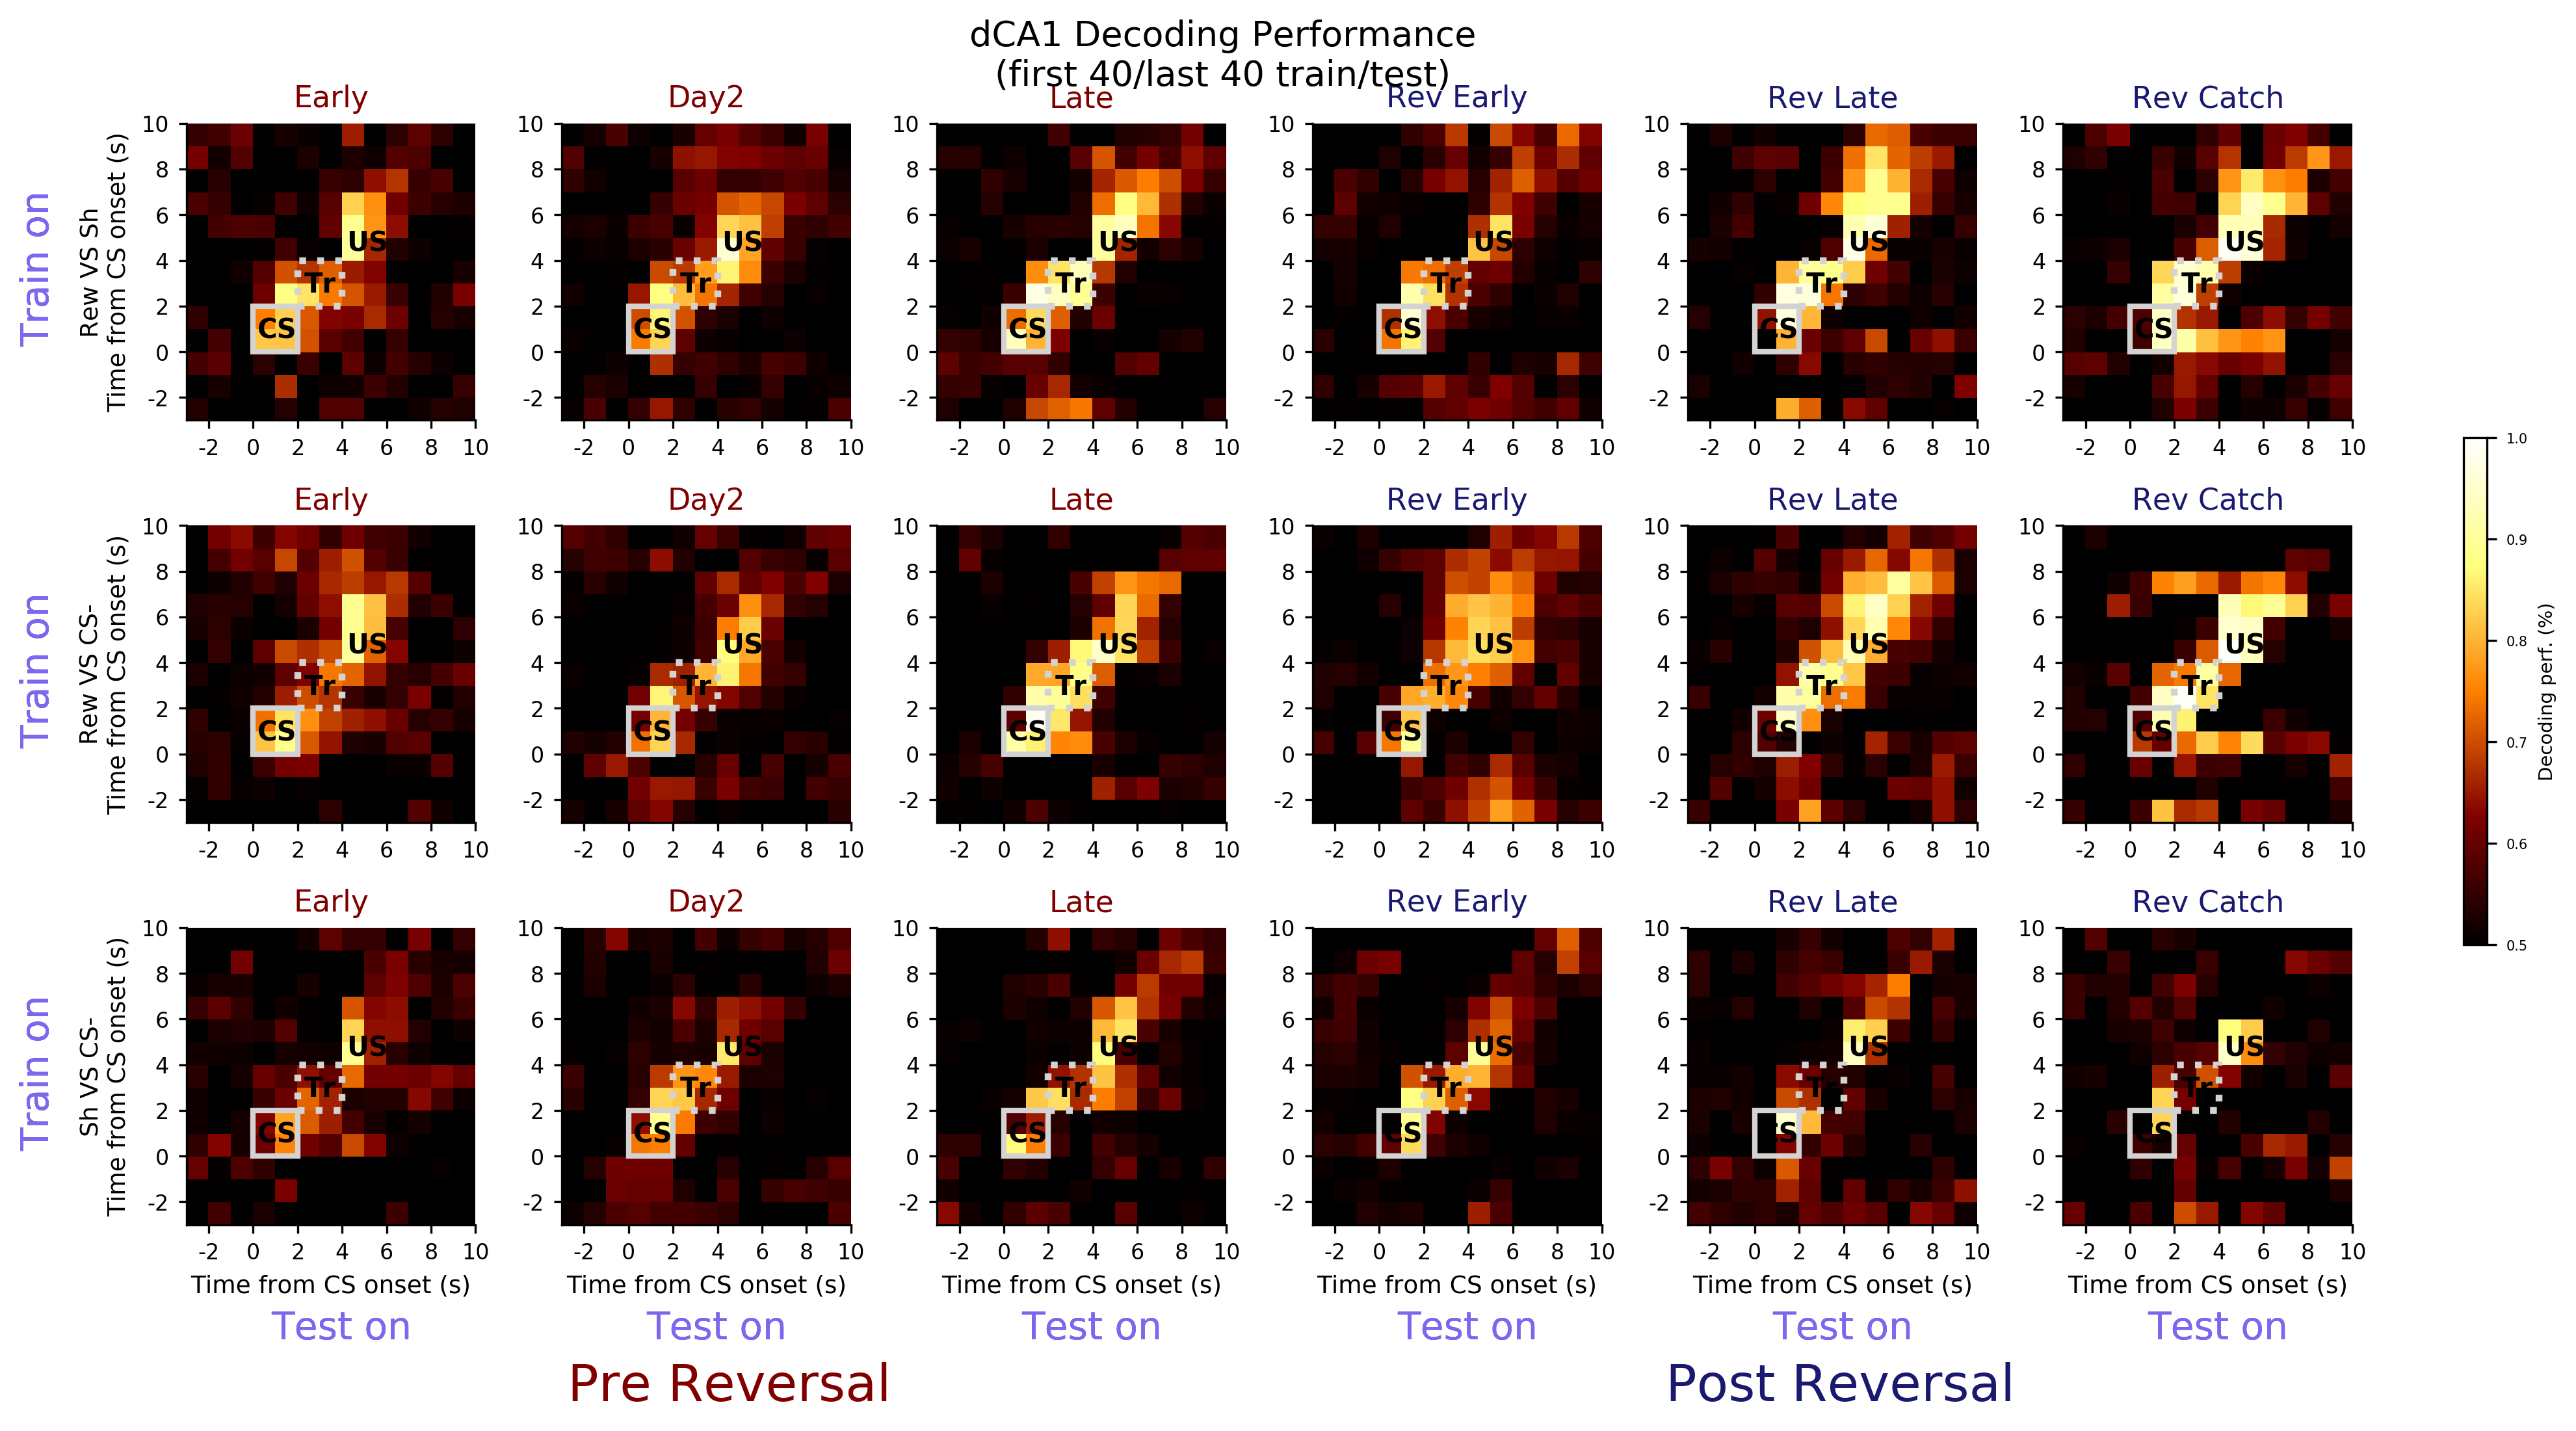

In [13]:
import matplotlib.patches as patches

fig, ax = pl.subplots(3, 6, figsize=(12, 6.5))#, sharex=True, sharey=True)

for label,c,mm,cmap,lab in zip(non_catch_labels,range(3),([.5,1],[.5,1],[.5,1]),['afmhot','afmhot','afmhot'],['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
    for sess,x in zip(sessions,range(len(sessions))):
        im = ax[c][x].pcolormesh(eval("subset_%s_dhpc[sess]"%label),vmin=mm[0],vmax=mm[1],cmap=cmap)
        ax[c][x].set_xticks(np.arange(1,14,2))
        ax[c][x].set_yticks(np.arange(1,14,2))
        #ax[c][x].set_ylim(-.5, 12.5)
        #ax[c][x].set_xlim(-.5, 12.5)
        ax[c][x].set_xticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][x].set_yticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][0].set_ylabel(lab+'\nTime from CS onset (s)', fontsize=9)
        ax[2][x].set_xlabel('Time from CS onset (s)', fontsize=9)
        ax[2][x].text(x=3.8,y=-5,s='Test on', fontsize=14,color='mediumslateblue')
        ax[c][0].text(x=-7.5,y=8.8,s='Train on', fontsize=14,color='mediumslateblue',rotation=90)
        ax[c][x].set_title(session_labels[x],fontsize=11,color=session_colors[x])
        ax[c][x].tick_params(length=3)
# Add the patch to the Axes
for x in range(6):
    for c in range(3):
        CS = patches.Rectangle((3,3),2,2,linewidth=2,edgecolor='lightgrey',facecolor='none')
        Tr = patches.Rectangle((5,5),2,2,linewidth=2.5,edgecolor='lightgrey',facecolor='none',linestyle=':')
        ax[c][x].add_patch(CS)
        ax[c][x].add_patch(Tr)
        ax[c][x].text(3.2,3.6,"CS",fontsize=10, weight='bold', color='k')
        ax[c][x].text(5.3,5.6,"Tr",fontsize=10, weight='bold', color='k')
        ax[c][x].text(7.2,7.4,"US",fontsize=10, weight='bold', color='k')

pl.suptitle('dCA1 Decoding Performance\n(first 40/last 40 train/test)',y=1.03,fontsize=13)
fig.text(x=.22,y=-0.06,s='Pre Reversal',fontsize=19, color='maroon')
fig.text(x=.689,y=-0.06,s='Post Reversal',fontsize=19, color='midnightblue')

cax = fig.add_axes([1.03,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='Decoding perf. (%)')
fig.tight_layout(pad=2)
fig.savefig('../figures/%s_subset_across_bins_d.pdf'%NOTEBOOK_NAME)

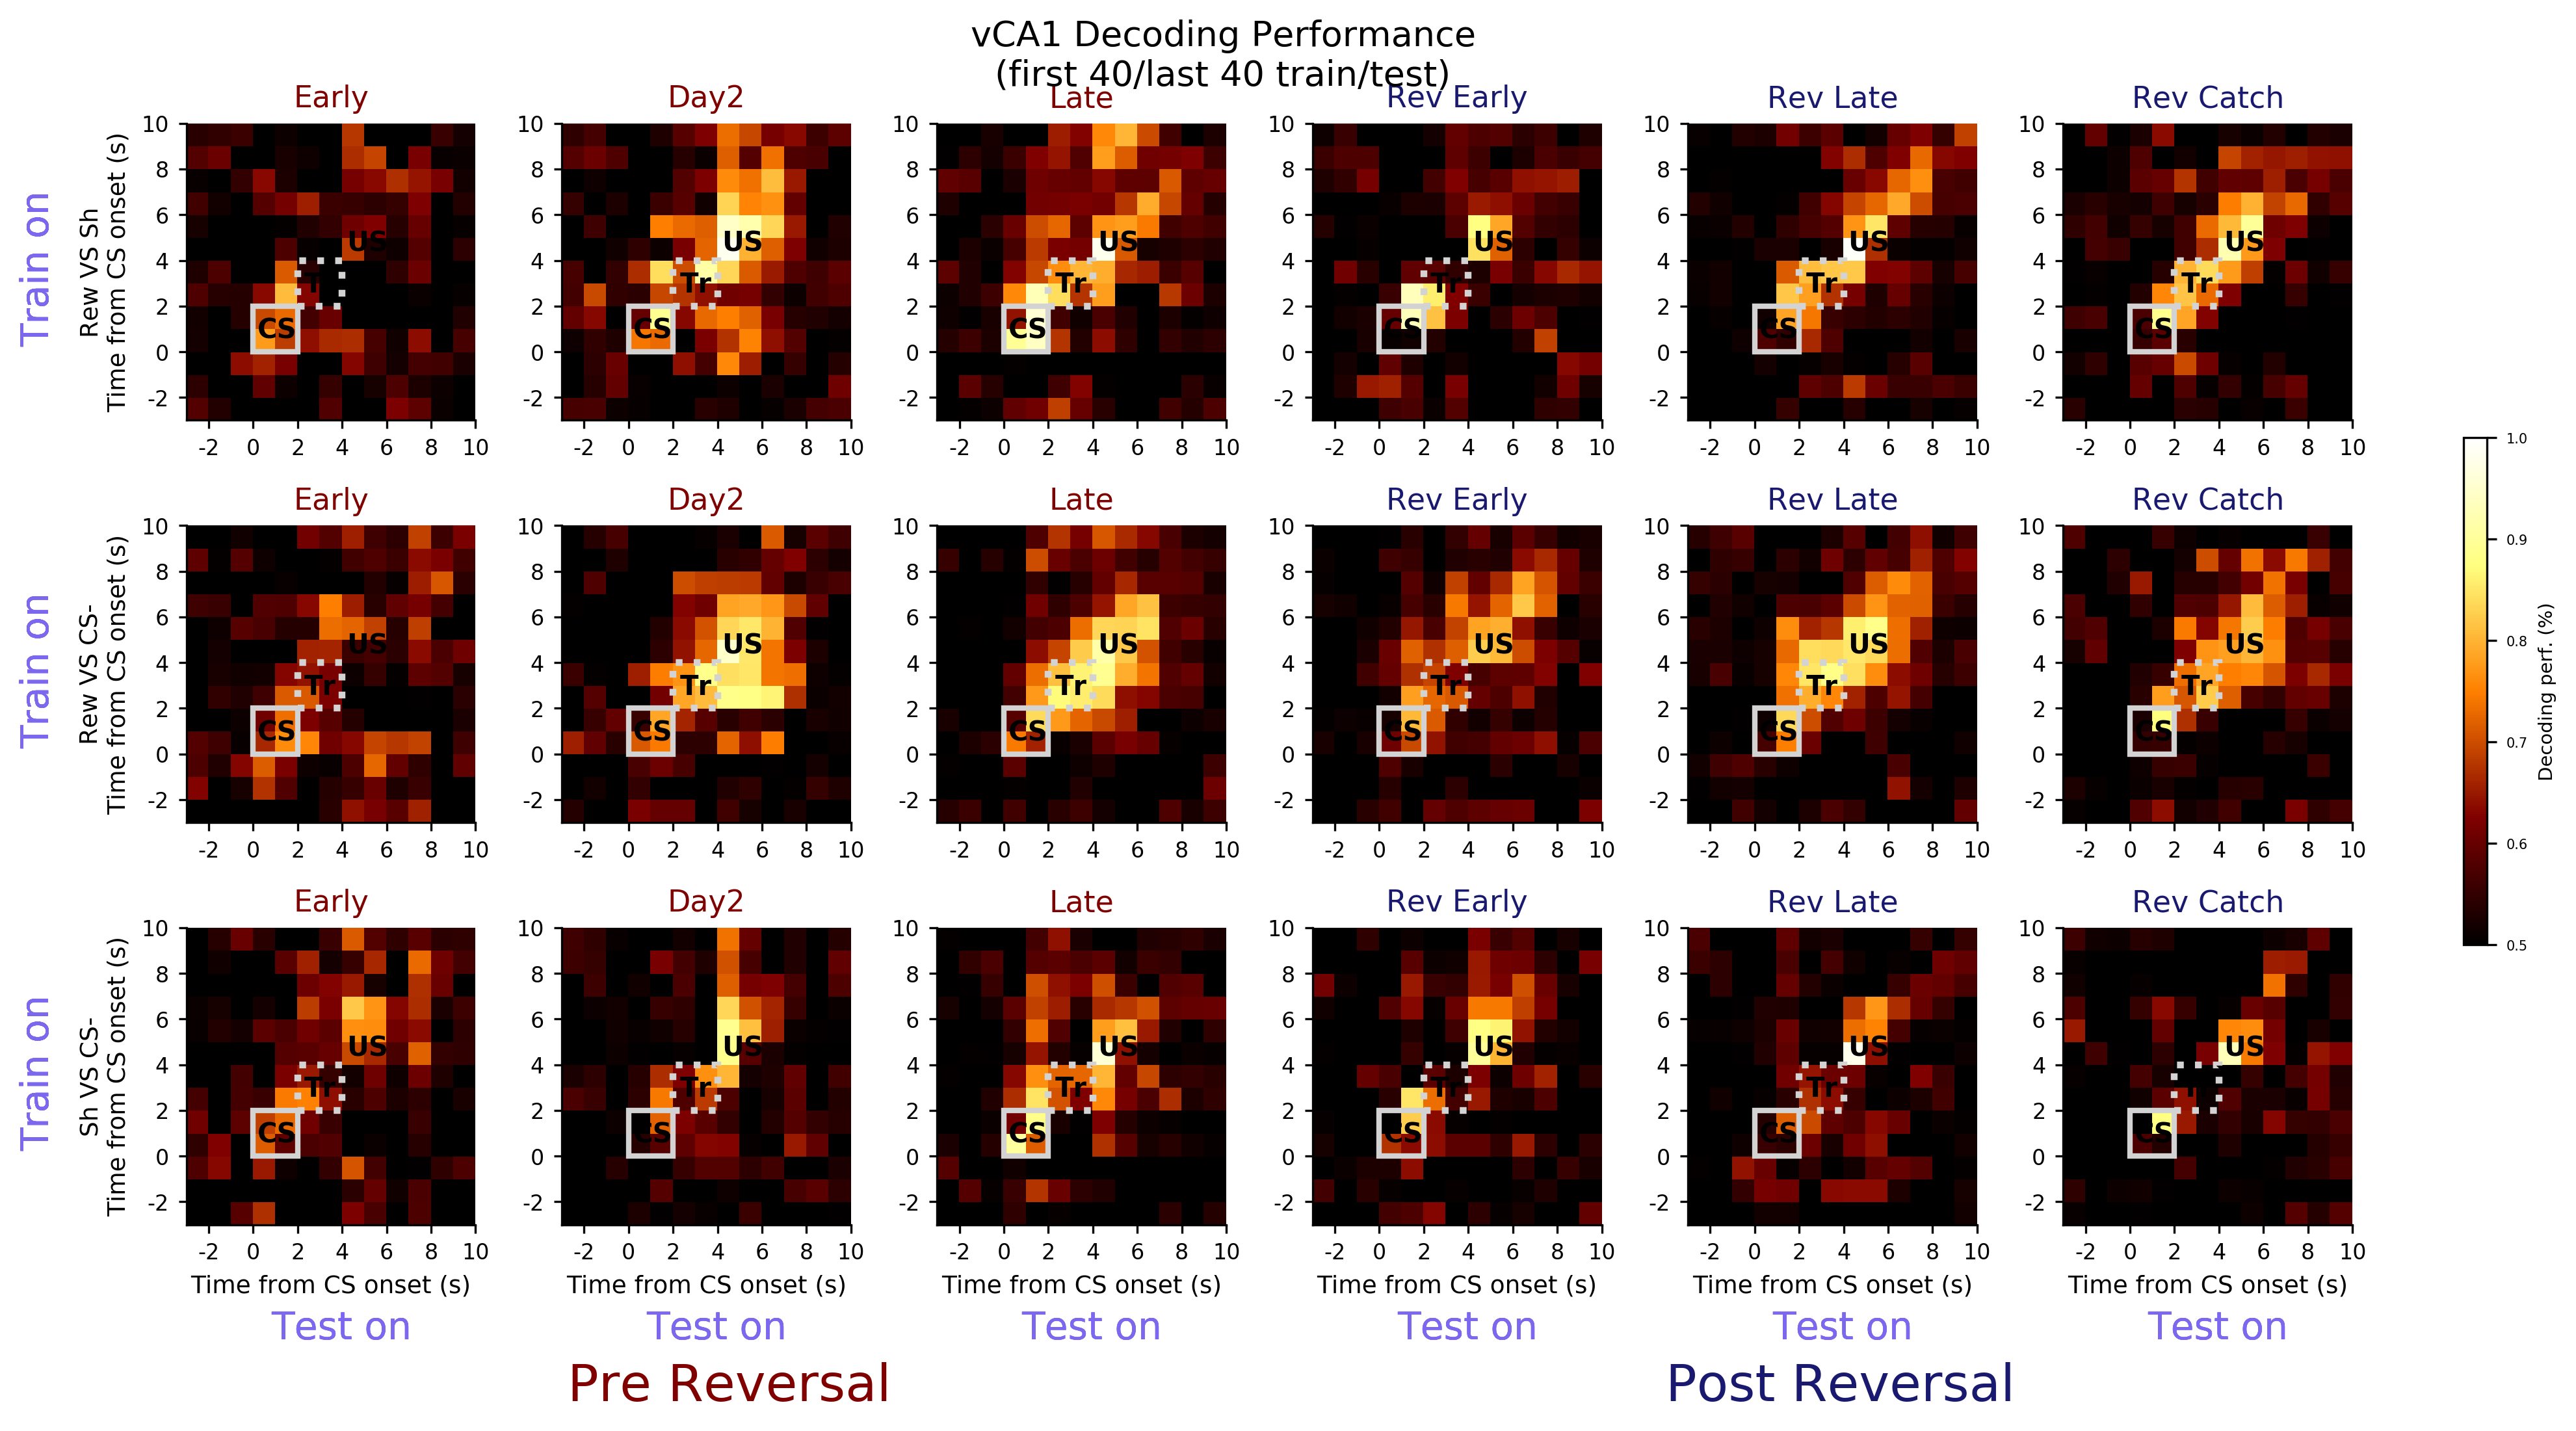

In [14]:
import matplotlib.patches as patches

fig, ax = pl.subplots(3, 6, figsize=(12, 6.5))#, sharex=True, sharey=True)

for label,c,mm,cmap,lab in zip(non_catch_labels,range(3),([.5,1],[.5,1],[.5,1]),['afmhot','afmhot','afmhot'],['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
    for sess,x in zip(sessions,range(len(sessions))):
        im = ax[c][x].pcolormesh(eval("subset_%s_vhpc[sess]"%label),vmin=mm[0],vmax=mm[1],cmap=cmap)
        ax[c][x].set_xticks(np.arange(1,14,2))
        ax[c][x].set_yticks(np.arange(1,14,2))
        #ax[c][x].set_ylim(-.5, 12.5)
        #ax[c][x].set_xlim(-.5, 12.5)
        ax[c][x].set_xticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][x].set_yticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][0].set_ylabel(lab+'\nTime from CS onset (s)', fontsize=9)
        ax[2][x].set_xlabel('Time from CS onset (s)', fontsize=9)
        ax[2][x].text(x=3.8,y=-5,s='Test on', fontsize=14,color='mediumslateblue')
        ax[c][0].text(x=-7.5,y=8.8,s='Train on', fontsize=14,color='mediumslateblue',rotation=90)
        ax[c][x].set_title(session_labels[x],fontsize=11,color=session_colors[x])
        ax[c][x].tick_params(length=3)
# Add the patch to the Axes
for x in range(6):
    for c in range(3):
        CS = patches.Rectangle((3,3),2,2,linewidth=2,edgecolor='lightgrey',facecolor='none')
        Tr = patches.Rectangle((5,5),2,2,linewidth=2.5,edgecolor='lightgrey',facecolor='none',linestyle=':')
        ax[c][x].add_patch(CS)
        ax[c][x].add_patch(Tr)
        ax[c][x].text(3.2,3.6,"CS",fontsize=10, weight='bold', color='k')
        ax[c][x].text(5.3,5.6,"Tr",fontsize=10, weight='bold', color='k')
        ax[c][x].text(7.2,7.4,"US",fontsize=10, weight='bold', color='k')

pl.suptitle('vCA1 Decoding Performance\n(first 40/last 40 train/test)',y=1.03,fontsize=13)
fig.text(x=.22,y=-0.06,s='Pre Reversal',fontsize=19, color='maroon')
fig.text(x=.689,y=-0.06,s='Post Reversal',fontsize=19, color='midnightblue')

cax = fig.add_axes([1.03,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='Decoding perf. (%)')
fig.tight_layout(pad=2)
fig.savefig('../figures/%s_subset_across_bins_v.pdf'%NOTEBOOK_NAME)

## now compare vhpc vs dhpc decoding

In [72]:
for r in 'dhpc','vhpc':
    for label in non_catch_labels:
        for t in range (13):
            for c in range (13):
                exec('scores_gmin_tb_distinct_%s_VS_%s_%s_%s = {}'%(t,c,label,r))
                for sess in sessions:
                    exec("scores_gmin_tb_distinct_%s_VS_%s_%s_%s = ut.load_variable('scores_gmin_tb_distinct_%s_VS_%s_%s',\
                         '../notebooks/autorestore/decoding_around_onset_combined_1sec_%s/')"%(t,c,label,r,t,c,label,r))

In [73]:
loops = 10
for t in range (13):
    for label in non_catch_labels:
        exec('distinct%s_MannWhitney_dhpcVSvhpc_%s = {}'%(t,label))
for sess in sessions:
    for label in non_catch_labels:
        for t in range (13):
            exec("distinct%s_MannWhitney_dhpcVSvhpc_%s['%s'] = []"%(t,label,sess))
            for c in range (13):
                eval('distinct%s_MannWhitney_dhpcVSvhpc_%s'%(t,label))[sess].insert(c,
                      sstats.mannwhitneyu(eval('scores_gmin_tb_distinct_%s_VS_%s_%s_dhpc[sess][:,0][:loops]'%(t,c,label)),
                      eval('scores_gmin_tb_distinct_%s_VS_%s_%s_vhpc[sess][:,0][:loops]'%(t,c,label)), alternative='two-sided'))
            for x,i in zip(eval('distinct%s_MannWhitney_dhpcVSvhpc_%s'%(t,label))[sess],range(len(eval('distinct%s_MannWhitney_dhpcVSvhpc_%s'%(t,label))[sess]))):
                exec("distinct%s_MannWhitney_dhpcVSvhpc_%s[sess][i] = x[-1]"%(t,label)) #only take p-values

In [74]:
for label in non_catch_labels:
    exec("distinct_MannWhitney_dhpcVSvhpc_%s={}"%label)
    for sess in sessions:
        exec("distinct_MannWhitney_dhpcVSvhpc_%s['%s']=(distinct0_MannWhitney_dhpcVSvhpc_%s['%s'], distinct1_MannWhitney_dhpcVSvhpc_%s['%s'], distinct2_MannWhitney_dhpcVSvhpc_%s['%s'], distinct3_MannWhitney_dhpcVSvhpc_%s['%s'],\
                          distinct4_MannWhitney_dhpcVSvhpc_%s['%s'], distinct5_MannWhitney_dhpcVSvhpc_%s['%s'], distinct6_MannWhitney_dhpcVSvhpc_%s['%s'], distinct7_MannWhitney_dhpcVSvhpc_%s['%s'],\
                          distinct8_MannWhitney_dhpcVSvhpc_%s['%s'], distinct9_MannWhitney_dhpcVSvhpc_%s['%s'], distinct10_MannWhitney_dhpcVSvhpc_%s['%s'], distinct11_MannWhitney_dhpcVSvhpc_%s['%s'],\
                          distinct12_MannWhitney_dhpcVSvhpc_%s['%s'])"%(label,sess,label,sess,label,sess,label,sess,label,sess,label,sess,label,sess,label,sess,label,sess,
                                                                       label,sess,label,sess,label,sess,label,sess,label,sess,))
        exec("np.array([distinct_MannWhitney_dhpcVSvhpc_%s['%s']])"%(label,sess))

In [75]:
import copy
for label in non_catch_labels:
    exec("distinct_MannWhitney_dhpcVSvhpc_%s_to_plot = copy.deepcopy(distinct_MannWhitney_dhpcVSvhpc_%s)"%(label,label))

In [76]:
##code time bins as sig with vhpc higher(-1), dhpc higher(1), or not significant(0)
#for sess in sessions:
#    for labels in non_catch_labels:
#        for i in range(len(eval("distinct_%s_vhpc[sess]"%label))):
#            for j in range(len(eval("distinct_%s_vhpc[sess]"%label)[i])):
#                exec("distinct_MannWhitney_dhpcVSvhpc_%s_to_plot[sess][i][j]=0"%label)
#                if eval("distinct_%s_vhpc[sess][i][j]"%label) > eval("distinct_%s_dhpc[sess][i][j]"%label) and eval("distinct_MannWhitney_dhpcVSvhpc_%s[sess][i][j]"%label) < 0.05:
#                    exec("distinct_MannWhitney_dhpcVSvhpc_%s_to_plot[sess][i][j]=-1"%label)
#                if eval("distinct_%s_vhpc[sess][i][j]"%label) < eval("distinct_%s_dhpc[sess][i][j]"%label) and eval("distinct_MannWhitney_dhpcVSvhpc_%s[sess][i][j]"%label) < 0.05:
#                    exec("distinct_MannWhitney_dhpcVSvhpc_%s_to_plot[sess][i][j]=1"%label)

In [77]:
#take log10 of sig time bins and assign sign for vhpc (-), or dhpc (+). Non significant data points are labeled 0
import math
for sess in sessions:
    for label in non_catch_labels:
        for i in range(len(eval("distinct_%s_vhpc[sess]"%label))):
            for j in range(len(eval("distinct_%s_vhpc[sess]"%label)[i])):
                exec("distinct_MannWhitney_dhpcVSvhpc_%s_to_plot[sess][i][j]=0"%label)
                if eval("distinct_%s_vhpc[sess][i][j]"%label) > eval("distinct_%s_dhpc[sess][i][j]"%label) and eval("distinct_MannWhitney_dhpcVSvhpc_%s[sess][i][j]"%label) < 0.05:
                    exec("distinct_MannWhitney_dhpcVSvhpc_%s_to_plot[sess][i][j]= (math.log10(distinct_MannWhitney_dhpcVSvhpc_%s[sess][i][j]))"%(label,label))
                if eval("distinct_%s_vhpc[sess][i][j]"%label) < eval("distinct_%s_dhpc[sess][i][j]"%label) and eval("distinct_MannWhitney_dhpcVSvhpc_%s[sess][i][j]"%label) < 0.05:
                    exec("distinct_MannWhitney_dhpcVSvhpc_%s_to_plot[sess][i][j]= -(math.log10(distinct_MannWhitney_dhpcVSvhpc_%s[sess][i][j]))"%(label,label))
                #else:
                #    distinct_MannWhitney_dhpcVSvhpc_to_plot[sess][i][j]=0

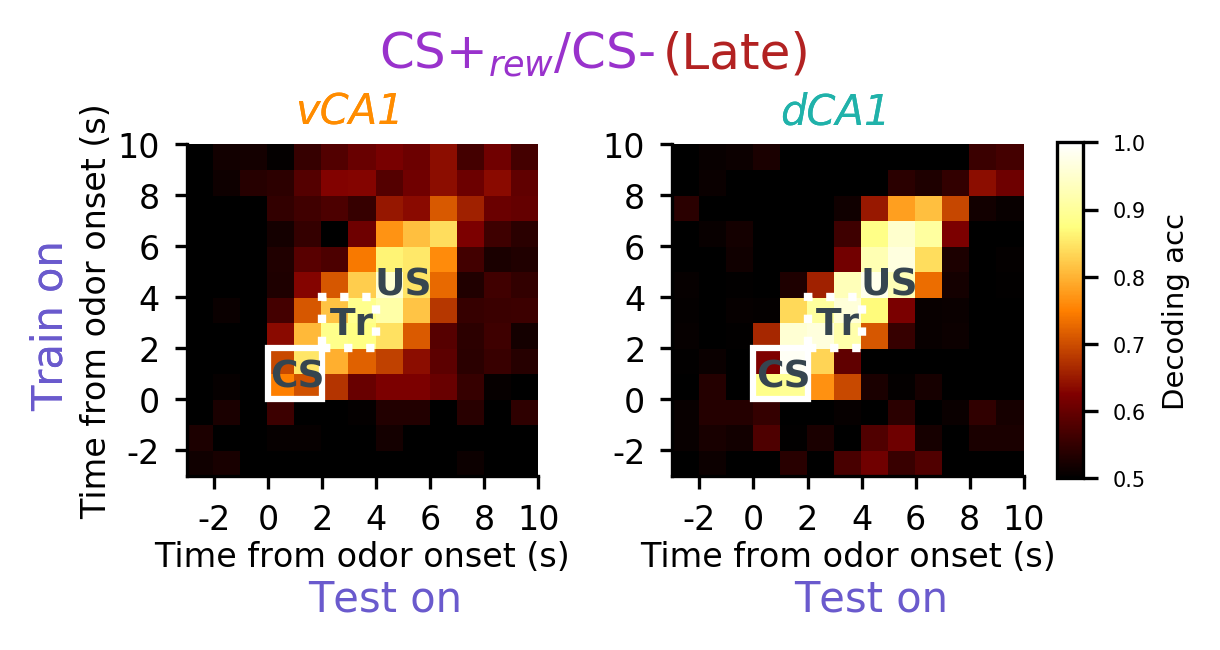

In [266]:
import matplotlib.patches as patches

fig, ax = pl.subplots(1, 2, figsize=(3.5, 1.75))#, sharex=True, sharey=True)

for reg,c,mm,cmap,lab in zip(['vhpc','dhpc'],range(2),([.5,1],[.5,1]),['afmhot','afmhot'],['vCA1','dCA1']):
    #for sess,x in zip(sessions,range(len(sessions))):
        im = ax[c].pcolormesh(eval("distinct_rwVScsm_%s['post']"%reg),vmin=mm[0],vmax=mm[1],cmap=cmap)
        ax[c].set_xticks(np.arange(1,14,2))
        ax[c].set_yticks(np.arange(1,14,2))
        ax[c].set_xticklabels(['-2','0','2','4', '6','8','10'],fontsize=8)
        ax[c].set_yticklabels(['-2','0','2','4', '6','8','10'],fontsize=8)
        ax[0].set_ylabel('Time from odor onset (s)', fontsize=8,labelpad=1)
        ax[c].set_xlabel('Time from odor onset (s)', fontsize=8,labelpad=1)
        #ax[c].set_title('Late',fontsize=12,color='firebrick')
        ax[c].tick_params(length=3)
        ax[c].text(4.5,-5.3,"Test on",fontsize=10,color='slateblue')
        ax[0].text(-5.8,8,"Train on", fontsize=10, rotation=90,color='slateblue')
        ax[0].text(4,13.8,"vCA1", fontsize=10,color='darkorange',style='italic')
        ax[1].text(4,13.8,"dCA1", fontsize=10,color='lightseagreen',style='italic')
        #ax[0].vlines(-7,1.5,10,color='darkorange',lw=1.3,clip_on=False)
        #ax[1].vlines(3,1.5,14,color='lightseagreen',lw=1.3,clip_on=False)
# Add the patch to the Axes
for c in range(2):
        CS = patches.Rectangle((3,3),2,2,linewidth=1.5,edgecolor='w',facecolor='none')
        Tr = patches.Rectangle((5,5),2,2,linewidth=2,edgecolor='w',facecolor='none',linestyle=':')
        ax[c].add_patch(CS)
        ax[c].add_patch(Tr)
        ax[c].text(3.1,3.5, "CS",fontsize=9, weight='bold', color='#36454F')
        ax[c].text(5.3,5.55,"Tr",fontsize=9, weight='bold', color='#36454F')
        ax[c].text(6.95,7.1,"US",fontsize=9, weight='bold', color='#36454F')

ax[0].text(7.1,16,'CS+$_{rew}$/CS-',fontsize=12,color='darkorchid')
ax[0].text(17.6,16,'(Late)',fontsize=12,color='firebrick')


cax = fig.add_axes([.97,0.26, 0.025, 0.64])
fig.colorbar(im, cax=cax, label='Decoding acc')
fig.tight_layout(pad=2)
fig.savefig('../figures/%s_gmin_across_bins_dv_Late_hor_CSmRw.pdf'%NOTEBOOK_NAME)

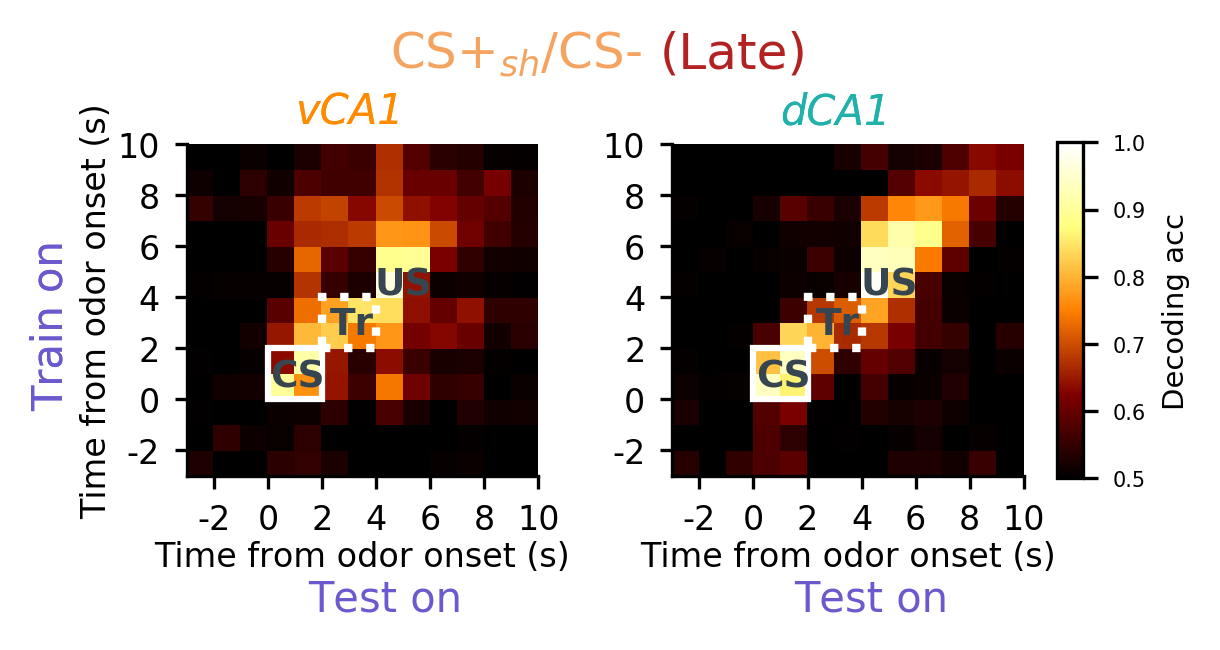

In [267]:
import matplotlib.patches as patches

fig, ax = pl.subplots(1, 2, figsize=(3.5, 1.75))#, sharex=True, sharey=True)

for reg,c,mm,cmap,lab in zip(['vhpc','dhpc'],range(2),([.5,1],[.5,1]),['afmhot','afmhot'],['vCA1','dCA1']):
    #for sess,x in zip(sessions,range(len(sessions))):
        im = ax[c].pcolormesh(eval("distinct_shVScsm_%s['post']"%reg),vmin=mm[0],vmax=mm[1],cmap=cmap)
        ax[c].set_xticks(np.arange(1,14,2))
        ax[c].set_yticks(np.arange(1,14,2))
        ax[c].set_xticklabels(['-2','0','2','4', '6','8','10'],fontsize=8)
        ax[c].set_yticklabels(['-2','0','2','4', '6','8','10'],fontsize=8)
        ax[0].set_ylabel('Time from odor onset (s)', fontsize=8,labelpad=1)
        ax[c].set_xlabel('Time from odor onset (s)', fontsize=8,labelpad=1)
        #ax[c].set_title('Late',fontsize=12,color='firebrick')
        ax[c].tick_params(length=3)
        ax[c].text(4.5,-5.3,"Test on",fontsize=10,color='slateblue')
        ax[0].text(-5.8,8,"Train on", fontsize=10, rotation=90,color='slateblue')
        ax[0].text(4,13.8,"vCA1", fontsize=10,color='darkorange',style='italic')
        ax[1].text(4,13.8,"dCA1", fontsize=10,color='lightseagreen',style='italic')
        #ax[0].vlines(-7,1.5,10,color='darkorange',lw=1.3,clip_on=False)
        #ax[1].vlines(3,1.5,14,color='lightseagreen',lw=1.3,clip_on=False)
# Add the patch to the Axes
for c in range(2):
        CS = patches.Rectangle((3,3),2,2,linewidth=1.5,edgecolor='w',facecolor='none')
        Tr = patches.Rectangle((5,5),2,2,linewidth=2,edgecolor='w',facecolor='none',linestyle=':')
        ax[c].add_patch(CS)
        ax[c].add_patch(Tr)
        ax[c].text(3.1,3.5, "CS",fontsize=9, weight='bold', color='#36454F')
        ax[c].text(5.3,5.55,"Tr",fontsize=9, weight='bold', color='#36454F')
        ax[c].text(6.95,7.1,"US",fontsize=9, weight='bold', color='#36454F')

ax[0].text(7.5,16,'CS+$_{sh}$/CS-',fontsize=12,color='sandybrown')
ax[0].text(17.5,16,'(Late)',fontsize=12,color='firebrick')


cax = fig.add_axes([.97,0.26, 0.025, 0.64])
fig.colorbar(im, cax=cax, label='Decoding acc')
fig.tight_layout(pad=2)
fig.savefig('../figures/%s_gmin_across_bins_dv_Late_hor_CSmSh.pdf'%NOTEBOOK_NAME)

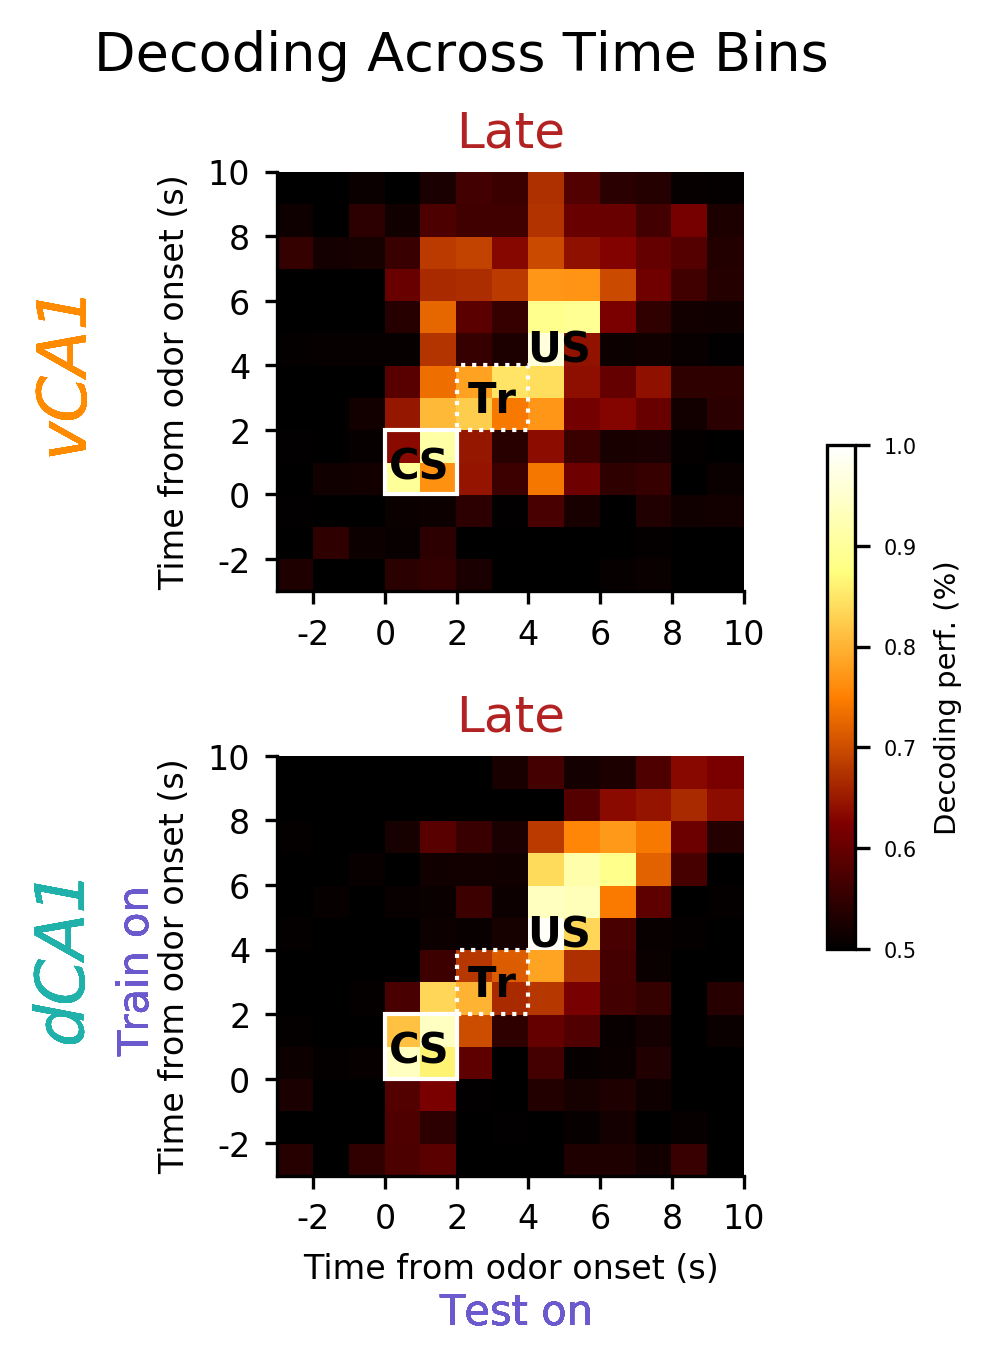

In [189]:
import matplotlib.patches as patches

fig, ax = pl.subplots(2, 1, figsize=(2.3, 4.2))#, sharex=True, sharey=True)

for reg,c,mm,cmap,lab in zip(['vhpc','dhpc'],range(2),([.5,1],[.5,1]),['afmhot','afmhot'],['vCA1','dCA1']):
    for sess,x in zip(sessions,range(len(sessions))):
        im = ax[c].pcolormesh(eval("distinct_shVScsm_%s['post']"%reg),vmin=mm[0],vmax=mm[1],cmap=cmap)
        ax[c].set_xticks(np.arange(1,14,2))
        ax[c].set_yticks(np.arange(1,14,2))
        ax[c].set_xticklabels(['-2','0','2','4', '6','8','10'],fontsize=8)
        ax[c].set_yticklabels(['-2','0','2','4', '6','8','10'],fontsize=8)
        ax[c].set_ylabel('Time from odor onset (s)', fontsize=8)
        ax[1].set_xlabel('Time from odor onset (s)', fontsize=8)
        ax[c].set_title('Late',fontsize=12,color='firebrick')
        ax[c].tick_params(length=3)
        ax[1].text(4.5,-4.6,"Test on", fontsize=10,color='slateblue')
        ax[1].text(-4.5,8,"Train on", fontsize=10, rotation=90,color='slateblue')
        ax[0].text(-6.9,8,"vCA1", fontsize=16, rotation=90,color='darkorange',style='italic')
        ax[1].text(-6.9,8,"dCA1", fontsize=16, rotation=90,color='lightseagreen',style='italic')
        #ax[0].vlines(-7,1.5,10,color='darkorange',lw=1.3,clip_on=False)
        #ax[1].vlines(3,1.5,14,color='lightseagreen',lw=1.3,clip_on=False)
# Add the patch to the Axes
for c in range(2):
        CS = patches.Rectangle((3,3),2,2,linewidth=1,edgecolor='w',facecolor='none')
        Tr = patches.Rectangle((5,5),2,2,linewidth=1,edgecolor='w',facecolor='none',linestyle=':')
        ax[c].add_patch(CS)
        ax[c].add_patch(Tr)
        ax[c].text(3.1,3.5, "CS",fontsize=10, weight='bold', color='k')
        ax[c].text(5.3,5.55,"Tr",fontsize=10, weight='bold', color='k')
        ax[c].text(6.95,7.1,"US",fontsize=10, weight='bold', color='k')

pl.suptitle('Decoding Across Time Bins',y=1.03,fontsize=13)

cax = fig.add_axes([1.03,0.3, 0.04, 0.4])
fig.colorbar(im, cax=cax, label='Decoding perf. (%)')
fig.tight_layout(pad=2)
#fig.savefig('../figures/%s_gmin_across_bins_dv_Late.pdf'%NOTEBOOK_NAME)

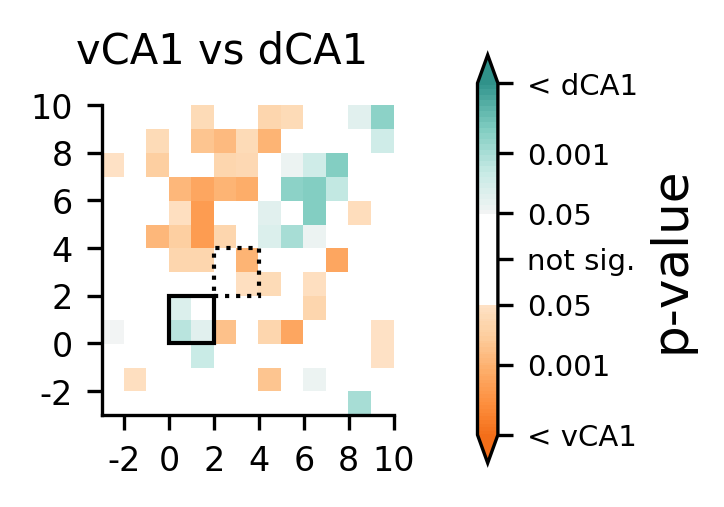

In [263]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#make unique colormap for emphasizing significant p-values
vsigs = cm.get_cmap('Oranges', 80)
dsigs = cm.get_cmap('BrBG', 80)
white = np.array([1, 1, 1, 1])
newcolors = np.vstack((vsigs(np.linspace(.6, 0, 128)),
                       dsigs(np.linspace(.4, .8, 128))))
#pink = np.array([.96, .09, .6, 1])
newcolors[95:161, :] = white
newcmap = ListedColormap(newcolors)


fig, ax = pl.subplots(1, 1, figsize=(1.7, 1.7), sharex=True, sharey=True)
vmin=-5
vmax=5
im = ax.pcolormesh(distinct_MannWhitney_dhpcVSvhpc_shVScsm_to_plot['post'],vmax=vmax,vmin=vmin,
                  cmap=newcmap)
#ax[x].axis('image')
#ax[x].pcolormesh(distinct_MannWhitney_dhpcVSvhpc_to_plot[sess],vmin=vmin, vmax=vmax,
#                  cmap='bwr')
ax.set_xticks(range(1,14,2))
ax.set_yticks(range(1,14,2))
ax.set_xticklabels(['-2','0','2','4', '6','8','10'],fontsize=8)
ax.set_yticklabels(['-2','0','2','4', '6','8','10'],fontsize=8)
#ax.set_ylabel('Time from odor onset (s)', fontsize=6.9)
#ax.set_xlabel('Time from odor onset (s)', fontsize=6.9)
#ax.set_title(session_labels[lab],fontsize=12,color=dark_co[lab])
#ax.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)

import matplotlib.patches as patches
# Create a Rectangle patch
CS = patches.Rectangle((3,3),2,2,linewidth=1,edgecolor='k',facecolor='none')
Tr = patches.Rectangle((5,5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
# Add the patch to the Axes
ax.add_patch(CS)
ax.add_patch(Tr)

#ax.text(4.75+.3,5.1+.5,"CS",fontsize=11, weight='bold', color='k')
#ax.text(6.85+.35,7.1+.5,"Tr",fontsize=11, weight='bold', color='k')
#ax.text(8.6+.5,8.8+.5,"US",fontsize=11, weight='bold', color='k')
#ax.text(6,-2.5,"Test on", fontsize=10,color='slateblue')
#ax.text(-3,10,"Train on", fontsize=10, rotation=90,color='slateblue')

pl.suptitle('vCA1 vs dCA1',y=1.,fontsize=10)

cax = fig.add_axes([1,0.15, 0.04, 0.8])
cbar = fig.colorbar(im, cax=cax,ticks=[-5,-3,-1.3,0,1.3,3,5],extend='both',extendfrac=.08)
cbar.ax.set_yticklabels(['< vCA1', '0.001','0.05', 'not sig.', '0.05','0.001','< dCA1'],fontsize=7)
cbar.set_label('p-value',size=12,labelpad=2)
fig.tight_layout(pad=3)
fig.savefig('../figures/%s_gmin_across_bins_dVSv_Utest_Late_CSmSh.pdf'%NOTEBOOK_NAME)

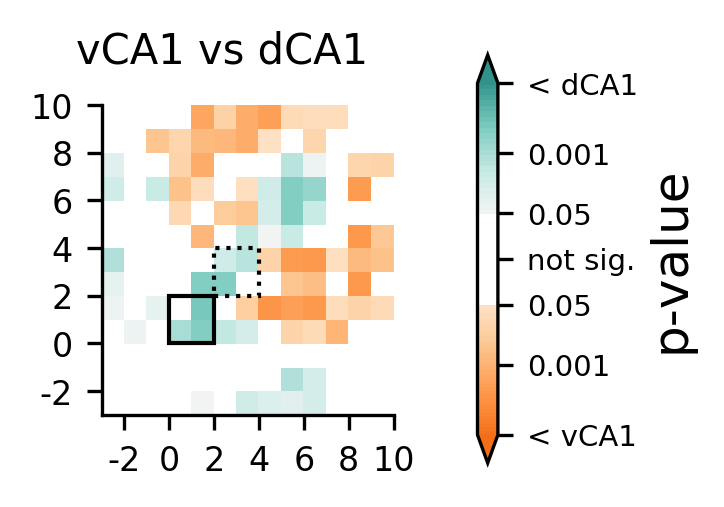

In [264]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#make unique colormap for emphasizing significant p-values
vsigs = cm.get_cmap('Oranges', 80)
dsigs = cm.get_cmap('BrBG', 80)
white = np.array([1, 1, 1, 1])
newcolors = np.vstack((vsigs(np.linspace(.6, 0, 128)),
                       dsigs(np.linspace(.4, .8, 128))))
#pink = np.array([.96, .09, .6, 1])
newcolors[95:161, :] = white
newcmap = ListedColormap(newcolors)


fig, ax = pl.subplots(1, 1, figsize=(1.7, 1.7), sharex=True, sharey=True)
vmin=-5
vmax=5
im = ax.pcolormesh(distinct_MannWhitney_dhpcVSvhpc_rwVScsm_to_plot['post'],vmax=vmax,vmin=vmin,
                  cmap=newcmap)
#ax[x].axis('image')
#ax[x].pcolormesh(distinct_MannWhitney_dhpcVSvhpc_to_plot[sess],vmin=vmin, vmax=vmax,
#                  cmap='bwr')
ax.set_xticks(range(1,14,2))
ax.set_yticks(range(1,14,2))
ax.set_xticklabels(['-2','0','2','4', '6','8','10'],fontsize=8)
ax.set_yticklabels(['-2','0','2','4', '6','8','10'],fontsize=8)
#ax.set_ylabel('Time from odor onset (s)', fontsize=6.9)
#ax.set_xlabel('Time from odor onset (s)', fontsize=6.9)
#ax.set_title(session_labels[lab],fontsize=12,color=dark_co[lab])
#ax.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)

import matplotlib.patches as patches
# Create a Rectangle patch
CS = patches.Rectangle((3,3),2,2,linewidth=1,edgecolor='k',facecolor='none')
Tr = patches.Rectangle((5,5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
# Add the patch to the Axes
ax.add_patch(CS)
ax.add_patch(Tr)

#ax.text(4.75+.3,5.1+.5,"CS",fontsize=11, weight='bold', color='k')
#ax.text(6.85+.35,7.1+.5,"Tr",fontsize=11, weight='bold', color='k')
#ax.text(8.6+.5,8.8+.5,"US",fontsize=11, weight='bold', color='k')
#ax.text(6,-2.5,"Test on", fontsize=10,color='slateblue')
#ax.text(-3,10,"Train on", fontsize=10, rotation=90,color='slateblue')

pl.suptitle('vCA1 vs dCA1',y=1.0,fontsize=10)

cax = fig.add_axes([1,0.15, 0.04, 0.8])
cbar = fig.colorbar(im, cax=cax,ticks=[-5,-3,-1.3,0,1.3,3,5],extend='both',extendfrac=.08)
cbar.ax.set_yticklabels(['< vCA1', '0.001','0.05', 'not sig.', '0.05','0.001','< dCA1'],fontsize=7)
cbar.set_label('p-value',size=12,labelpad=2)
fig.tight_layout(pad=3)
fig.savefig('../figures/%s_gmin_across_bins_dVSv_Utest_Late_CSmRw.pdf'%NOTEBOOK_NAME)

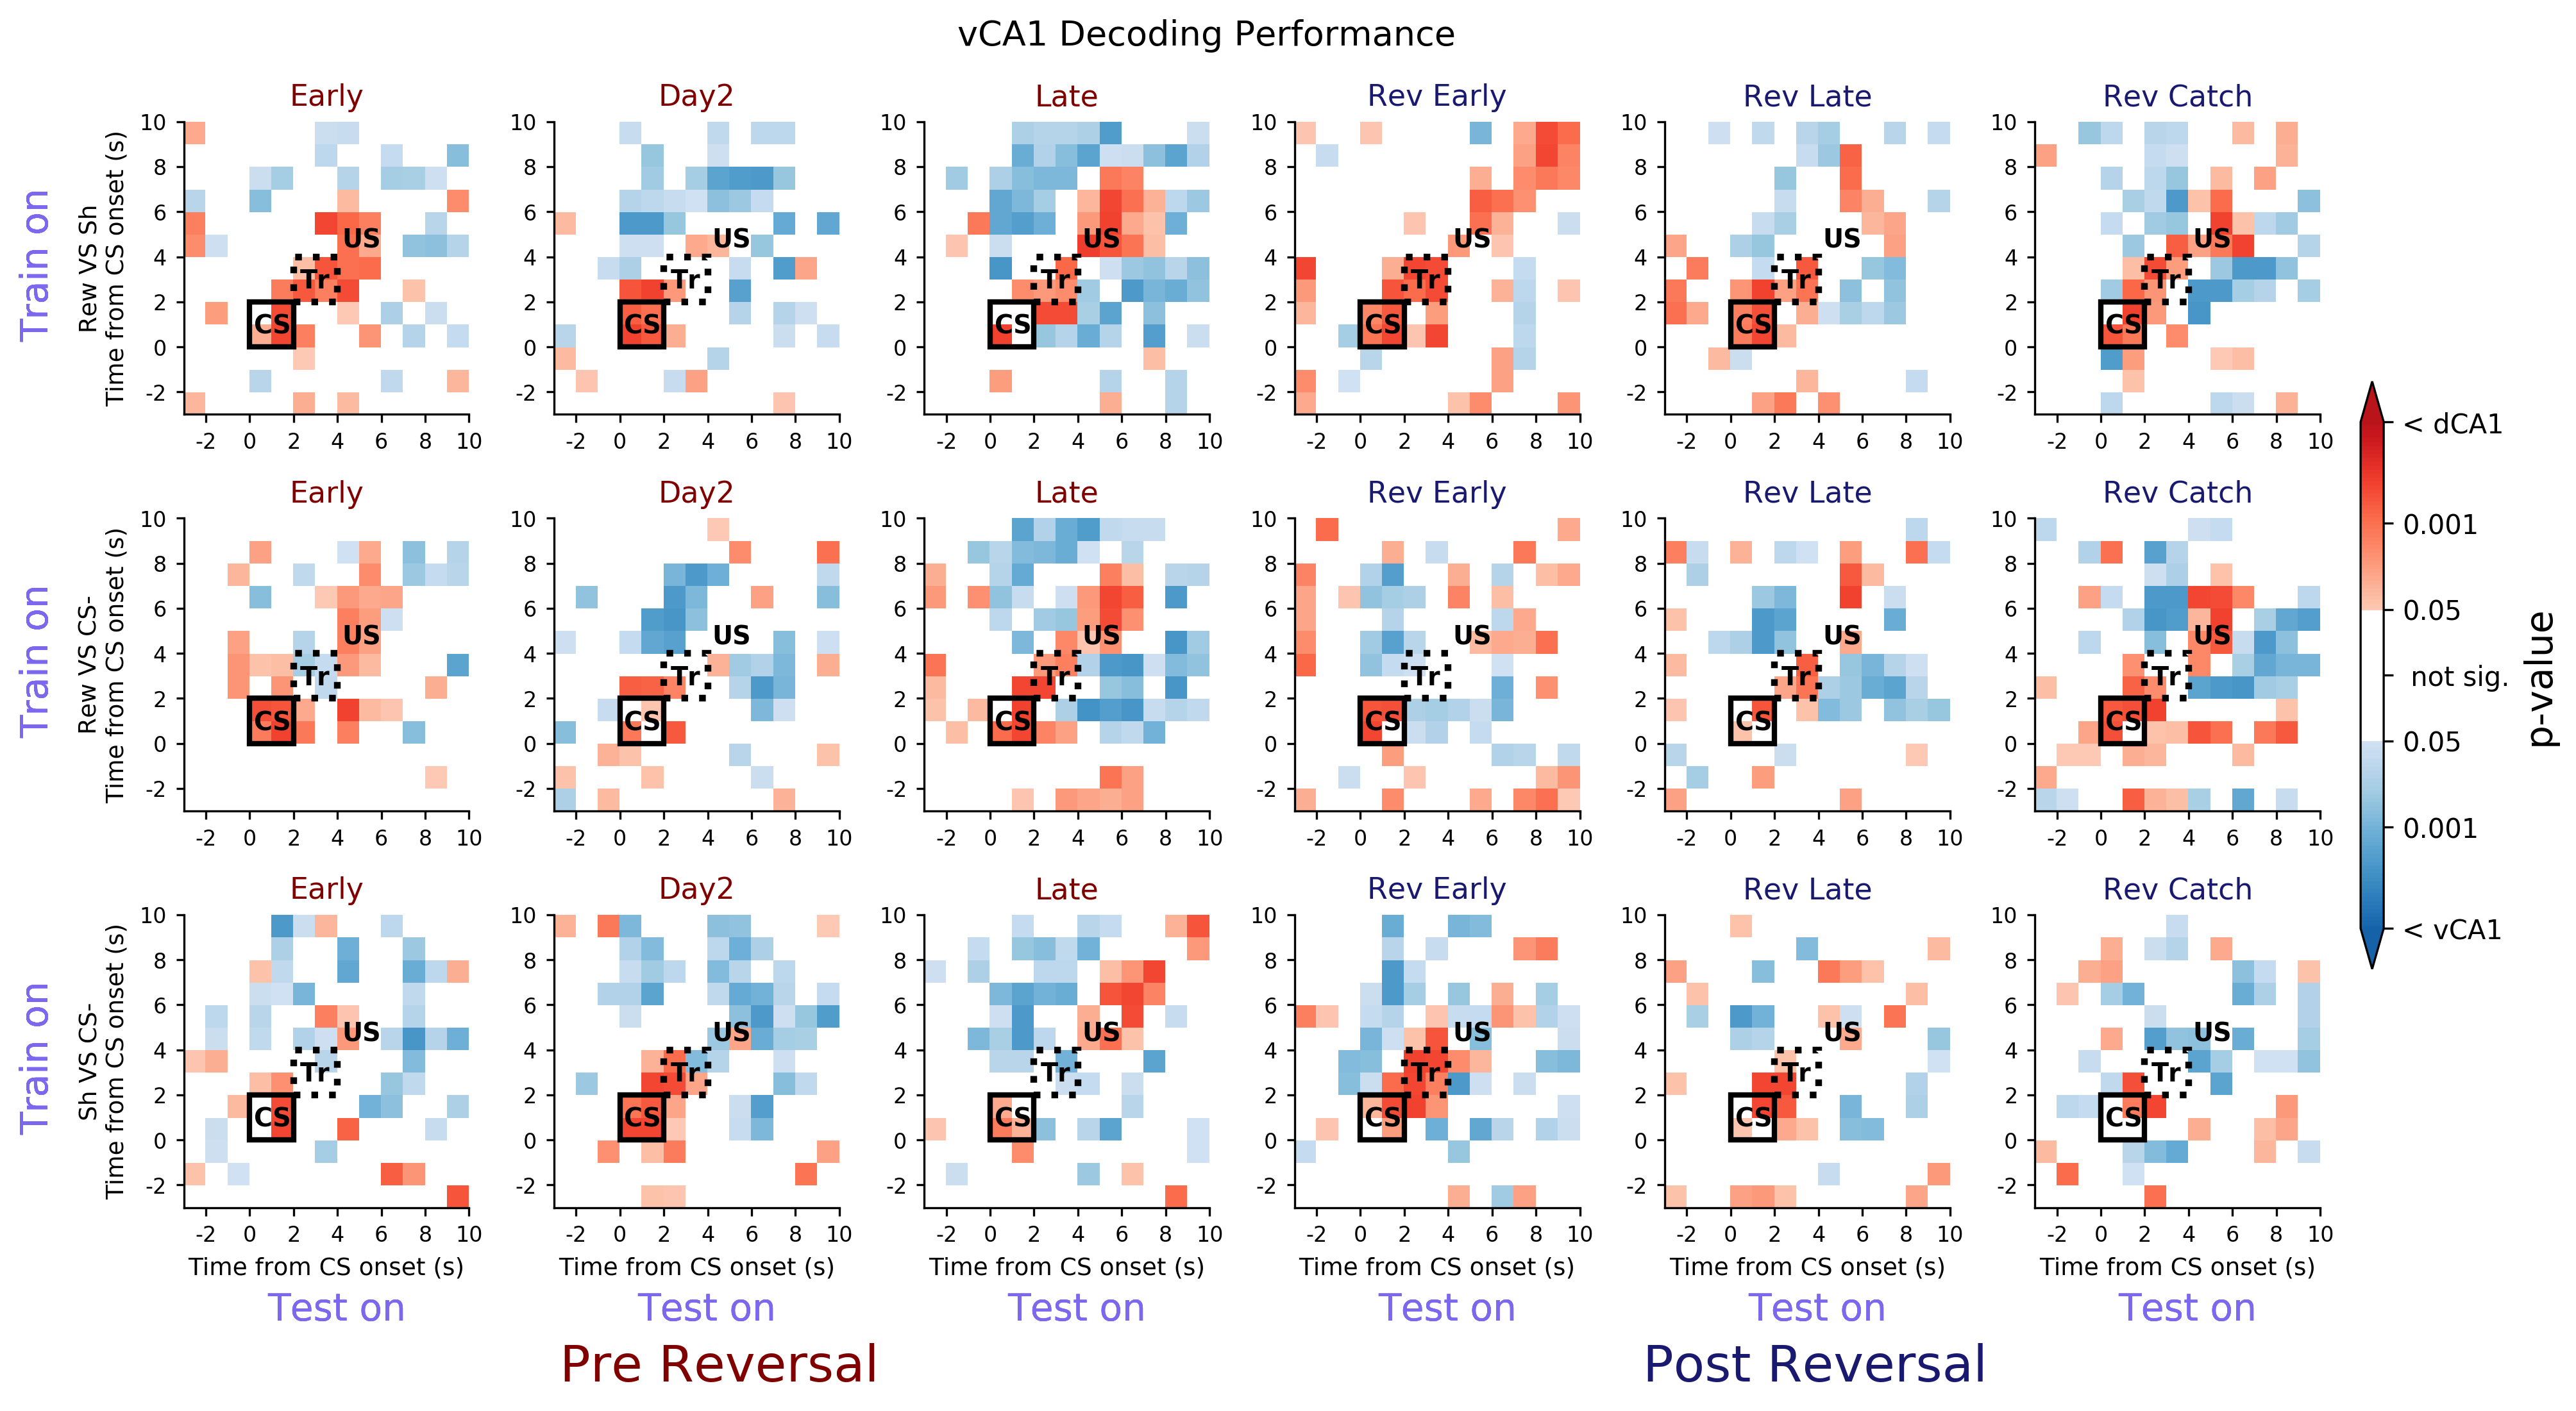

In [180]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#make unique colormap for emphasizing significant p-values
vsigs = cm.get_cmap('Blues', 80)
dsigs = cm.get_cmap('Reds', 80)
white = np.array([1, 1, 1, 1])
newcolors = np.vstack((vsigs(np.linspace(.8, 0, 128)),
                       dsigs(np.linspace(0, .8, 128))))
#pink = np.array([.96, .09, .6, 1])
newcolors[95:161, :] = white
newcmap = ListedColormap(newcolors)


vmin=-5
vmax=5

fig, ax = pl.subplots(3, 6, figsize=(12, 6.5))#, sharex=True, sharey=True)

for label,c,lab in zip(non_catch_labels,range(3),['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
    for sess,x in zip(sessions,range(len(sessions))):
        im = ax[c][x].pcolormesh(eval("distinct_MannWhitney_dhpcVSvhpc_%s_to_plot[sess]"%(label)),vmin=vmin,vmax=vmax,cmap=newcmap)
        ax[c][x].set_xticks(np.arange(1,14,2))
        ax[c][x].set_yticks(np.arange(1,14,2))
        #ax[c][x].set_ylim(-.5, 12.5)
        #ax[c][x].set_xlim(-.5, 12.5)
        ax[c][x].set_xticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][x].set_yticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][0].set_ylabel(lab+'\nTime from CS onset (s)', fontsize=9)
        ax[2][x].text(x=3.8,y=-5,s='Test on', fontsize=14,color='mediumslateblue')
        ax[c][0].text(x=-7.5,y=8.8,s='Train on', fontsize=14,color='mediumslateblue',rotation=90)
        ax[2][x].set_xlabel('Time from CS onset (s)', fontsize=9)
        ax[c][x].set_title(session_labels[x],fontsize=11,color=session_colors[x])
        ax[c][x].tick_params(length=3)
# Add the patch to the Axes
for x in range(6):
    for c in range(3):
        CS = patches.Rectangle((3,3),2,2,linewidth=2,edgecolor='k',facecolor='none')
        Tr = patches.Rectangle((5,5),2,2,linewidth=2.5,edgecolor='k',facecolor='none',linestyle=':')
        ax[c][x].add_patch(CS)
        ax[c][x].add_patch(Tr)
        ax[c][x].text(3.2,3.6,"CS",fontsize=9.5, weight='bold', color='k')
        ax[c][x].text(5.3,5.6,"Tr",fontsize=9.5, weight='bold', color='k')
        ax[c][x].text(7.2,7.4,"US",fontsize=9.5, weight='bold', color='k')

pl.suptitle('vCA1 Decoding Performance',y=1.03,fontsize=13)

fig.text(x=.22,y=-0.06,s='Pre Reversal',fontsize=19, color='maroon')
fig.text(x=.689,y=-0.06,s='Post Reversal',fontsize=19, color='midnightblue')

cax = fig.add_axes([1,0.27, 0.01, 0.47])
cbar = fig.colorbar(im, cax=cax,ticks=[-5,-3,-1.3,0,1.3,3,5],extend='both',extendfrac=.08)
cbar.ax.set_yticklabels(['< vCA1', '0.001','0.05', ' not sig.', '0.05','0.001','< dCA1'],fontsize=10)
cbar.ax.set_ylabel("p-value",fontsize=14)
fig.tight_layout(pad=2)
fig.savefig('../figures/%s_gmin_across_bins_dVSv_pval.pdf'%NOTEBOOK_NAME)

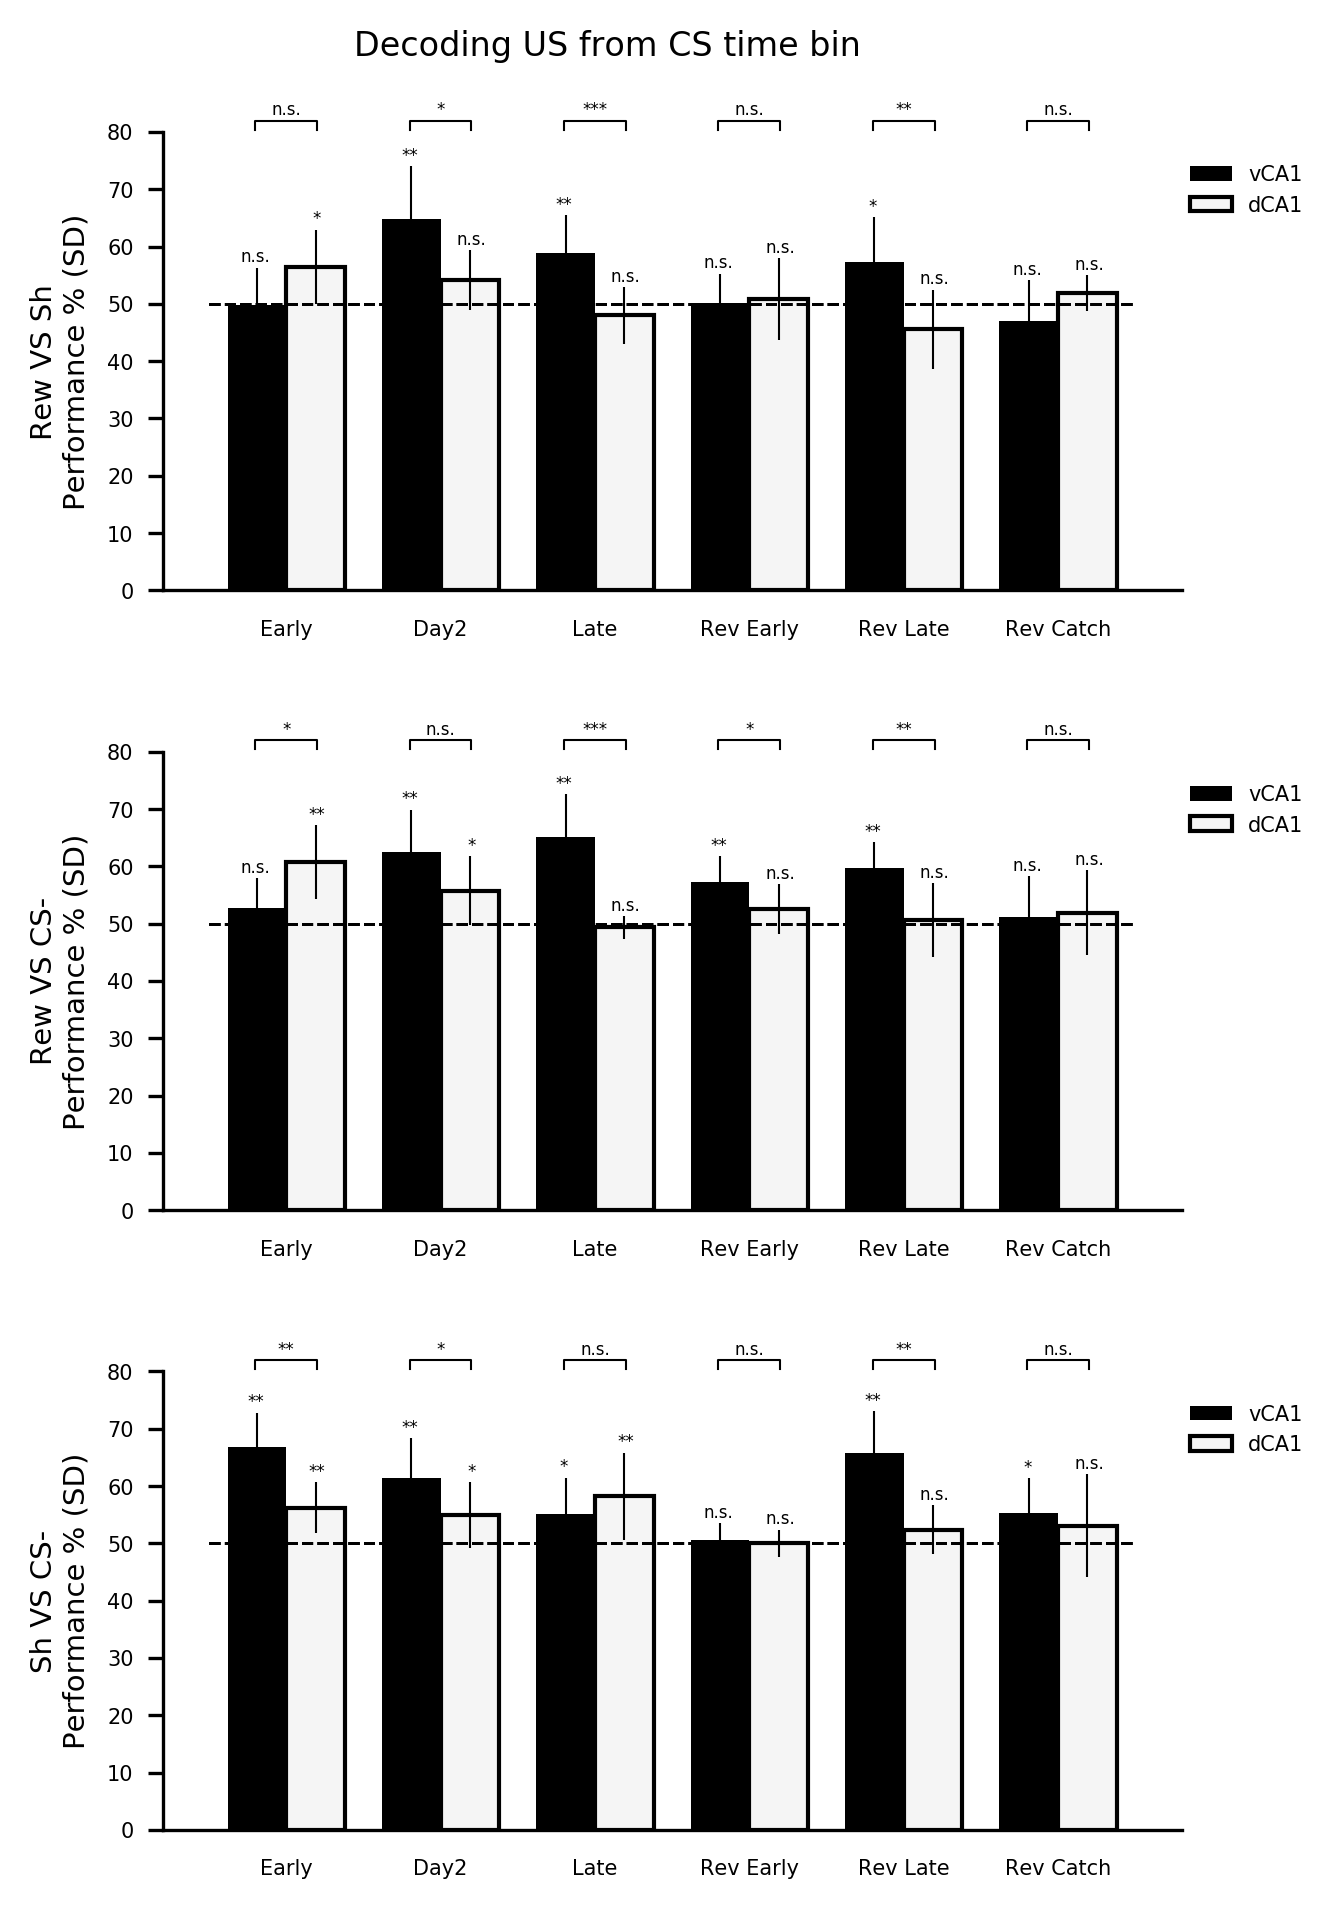

In [106]:
from matplotlib.patches import Patch
x = np.arange(len(sessions))  # the label locations
width = 0.38  # the width of the bars
loops = 10
for label in non_catch_labels:
    exec("v_%s={}"%label)
    exec("d_%s={}"%label)

fig, ax = pl.subplots(3,1,figsize=(4,6))
for sess,c,i in zip(sessions,['k','k','k','k','k','k'],range(len(sessions))):
    for label,r,la in zip(non_catch_labels,range(3),['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
        exec("v_%s[sess] = np.array(np.std(scores_gmin_tb_distinct_4_VS_8_%s_vhpc[sess][:,0][:loops]*100))"%(label,label))
        ax[r].bar(i - width/2, np.mean(eval("scores_gmin_tb_distinct_4_VS_8_%s_vhpc[sess][:loops].mean(0)[0]"%label))*100, width,
                  color=c, yerr = eval("v_%s[sess]"%label))
        exec("d_%s[sess] = np.array(np.std(scores_gmin_tb_distinct_4_VS_8_%s_dhpc[sess][:,0][:loops]*100))"%(label,label))
        ax[r].bar(i + width/2,  np.mean(eval("scores_gmin_tb_distinct_4_VS_8_%s_dhpc[sess][:loops].mean(0)[0]"%label))*100, width,
                  color='whitesmoke', edgecolor=c ,yerr = eval("d_%s[sess]"%label))
        ax[r].hlines(50,-.5,5.5, color='k', lw=.7, linestyles='dashed')
        ax[r].set_ylabel(la+'\nPerformance % (SD)')
        ax[r].set_xticks(x)
        ax[r].set_xticklabels(session_labels)
        ax[r].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
        ax[r].tick_params(axis='x',bottom=False)
        ax[r].set_ylim(0,80)
pvs=[]
for sess,i in zip(sessions, range(len(sessions))):
    for label,r in zip(non_catch_labels,range(3)):
        pvs.append(add_significance(ax[r], eval("scores_gmin_tb_distinct_4_VS_8_%s_vhpc[sess][:,0][:loops]"%label),
                                    eval("scores_gmin_tb_distinct_4_VS_8_%s_dhpc[sess][:,0][:loops]"%label),-.2+i,0.2+i,82))
            #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
            #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
        pvs.append(sig_vs_chance(ax[r],eval("scores_gmin_tb_distinct_4_VS_8_%s_vhpc[sess][:,0][:loops]"%label),.5,-.2+i,
                   np.mean(eval("scores_gmin_tb_distinct_4_VS_8_%s_vhpc[sess][:loops]"%label).mean(0)[0])*100+eval("v_%s[sess]"%label)+1,loops=loops,sig_func=None,colors='k'))
        pvs.append(sig_vs_chance(ax[r],eval("scores_gmin_tb_distinct_4_VS_8_%s_dhpc[sess][:,0][:loops]"%label),.5, .2+i,
                   np.mean(eval("scores_gmin_tb_distinct_4_VS_8_%s_dhpc[sess][:loops]"%label).mean(0)[0])*100+eval("d_%s[sess]"%label)+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding US from CS time bin',y=1.04,fontsize=8)
fig.tight_layout(h_pad=5)

#fig.savefig('../img/%s_decodingUSfromCS_allsess.pdf'%NOTEBOOK_NAME)

### make a array containing all data points for decoding >=2s across time bin

In [146]:
for reg in ['dhpc','vhpc']:
    for label in non_catch_labels:
        exec("beyond2s_%s_%s = {}"%(label,reg))
        for sess in sessions:
            exec("beyond2s_%s_%s[sess] = []"%(label,reg))
            for tb1 in [4,5,6,7,8]:
                for i in range(3,8):
                    if tb1 + i < 13:
                        exec("beyond2s_%s_%s[sess].append(scores_gmin_tb_distinct_%s_VS_%s_%s_%s[sess])"%(label,reg,tb1,tb1+i,label,reg))

In [148]:
#take mean of both forward and reverse train-test results
for reg in ['dhpc','vhpc']:
    for label in non_catch_labels:
        exec("beyond2s_all_means_%s_%s = {}"%(label,reg))
        for sess in sessions:
            exec("beyond2s_all_means_%s_%s[sess] = []"%(label,reg))
            for x in eval("range(len(beyond2s_%s_%s[sess]))"%(label,reg)):
                exec("beyond2s_all_means_%s_%s[sess].append(beyond2s_%s_%s[sess][x].mean(0).mean())"%(label,reg,label,reg))

In [149]:
#take mean of forward train-test results
for reg in ['dhpc','vhpc']:
    for label in non_catch_labels:
        exec("beyond2s_forward_means_%s_%s = {}"%(label,reg))
        for sess in sessions:
            exec("beyond2s_forward_means_%s_%s[sess] = []"%(label,reg))
            for x in eval("range(len(beyond2s_%s_%s[sess]))"%(label,reg)):
                exec("beyond2s_forward_means_%s_%s[sess].append(beyond2s_%s_%s[sess][x].mean(0)[0])"%(label,reg,label,reg))

In [150]:
#take mean of reverse train-test results
for reg in ['dhpc','vhpc']:
    for label in non_catch_labels:
        exec("beyond2s_reverse_means_%s_%s = {}"%(label,reg))
        for sess in sessions:
            exec("beyond2s_reverse_means_%s_%s[sess] = []"%(label,reg))
            for x in eval("range(len(beyond2s_%s_%s[sess]))"%(label,reg)):
                exec("beyond2s_reverse_means_%s_%s[sess].append(beyond2s_%s_%s[sess][x].mean(0)[1])"%(label,reg,label,reg))

In [168]:
np.std(beyond2s_all_means_rwVSsh_dhpc['pre'])*100

3.7185467628767102

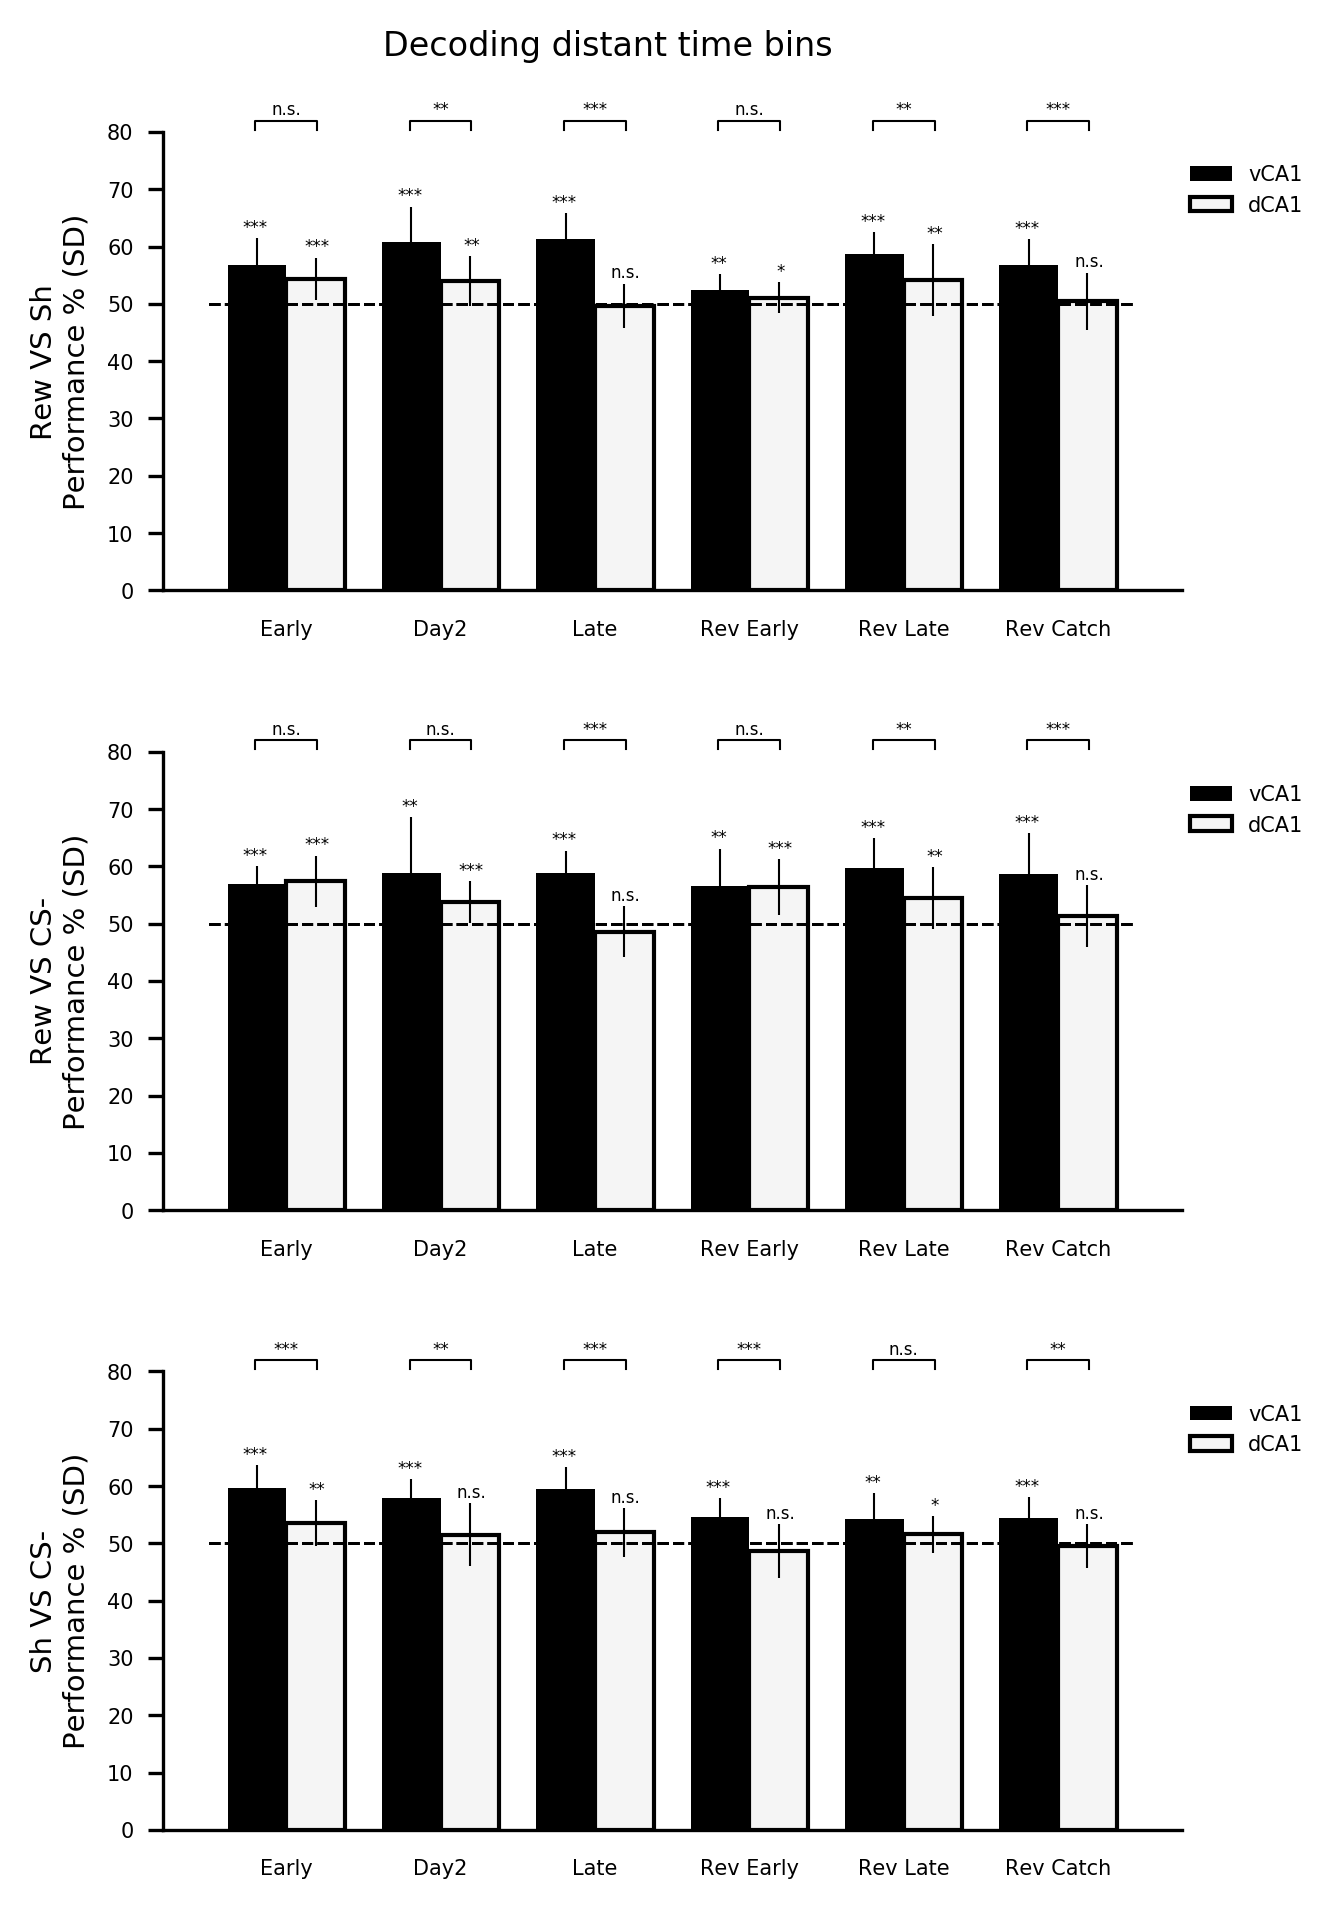

In [181]:
from matplotlib.patches import Patch
x = np.arange(len(sessions))  # the label locations
width = 0.38  # the width of the bars
loops = 10
for label in non_catch_labels:
    exec("v_%s={}"%label)
    exec("d_%s={}"%label)

fig, ax = pl.subplots(3,1,figsize=(4,6))
for sess,c,i in zip(sessions,['k','k','k','k','k','k'],range(len(sessions))):
    for label,r,la in zip(non_catch_labels,range(3),['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
        exec("v_%s[sess] = np.std(beyond2s_all_means_%s_vhpc[sess])*100"%(label,label))
        ax[r].bar(i - width/2, np.mean(eval("beyond2s_all_means_%s_vhpc[sess]"%label))*100, width,
                  color=c, yerr = eval("v_%s[sess]"%label))
        exec("d_%s[sess] = np.std(beyond2s_all_means_%s_dhpc[sess])*100"%(label,label))
        ax[r].bar(i + width/2,  np.mean(eval("beyond2s_all_means_%s_dhpc[sess]"%label))*100, width,
                  color='whitesmoke', edgecolor=c ,yerr = eval("d_%s[sess]"%label))
        ax[r].hlines(50,-.5,5.5, color='k', lw=.7, linestyles='dashed')
        ax[r].set_ylabel(la+'\nPerformance % (SD)')
        ax[r].set_xticks(x)
        ax[r].set_xticklabels(session_labels)
        ax[r].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
        ax[r].tick_params(axis='x',bottom=False)
        ax[r].set_ylim(0,80)
pvs=[]
for sess,i in zip(sessions, range(len(sessions))):
    for label,r in zip(non_catch_labels,range(3)):
        pvs.append(add_significance(ax[r], eval("beyond2s_all_means_%s_vhpc[sess]"%label),
                                    eval("beyond2s_all_means_%s_dhpc[sess]"%label),-.2+i,0.2+i,82))
            #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
            #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
        pvs.append(sig_vs_chance(ax[r],eval("beyond2s_all_means_%s_vhpc[sess]"%label),.5,-.2+i,
                   np.mean(eval("beyond2s_all_means_%s_vhpc[sess]"%label))*100+eval("v_%s[sess]"%label)+1,loops=loops,sig_func=None,colors='k'))
        pvs.append(sig_vs_chance(ax[r],eval("beyond2s_all_means_%s_dhpc[sess]"%label),.5, .2+i,
                   np.mean(eval("beyond2s_all_means_%s_dhpc[sess]"%label))*100+eval("d_%s[sess]"%label)+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding distant time bins',y=1.04,fontsize=8)
fig.tight_layout(h_pad=5)

fig.savefig('../figures/%s_decoding_distant_tbs.pdf'%NOTEBOOK_NAME)

U = 326.0 p = 2.30350156274e-05 r = 0.691531633665


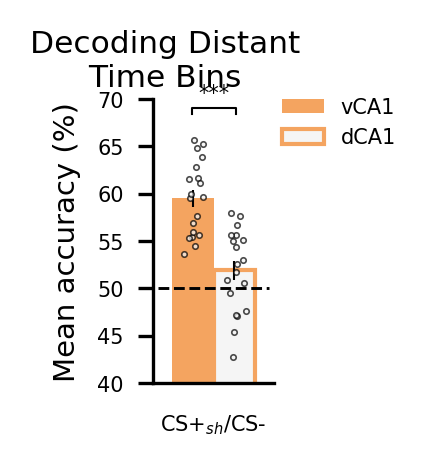

In [18]:
from matplotlib.patches import Patch
width = 0.38  # the width of the bars
loops = len(beyond2s_all_means_rwVScsm_vhpc['post'])
v={}
d={}
i=0
fig, ax = pl.subplots(1,1,figsize=(.9,1.3))
v['post'] = np.std(beyond2s_all_means_shVScsm_vhpc['post'])/np.sqrt(loops-1)*100
ax.bar(i - width/2, np.mean(beyond2s_all_means_shVScsm_vhpc['post'])*100, width,
          color='sandybrown', yerr = v['post'])
ax.scatter(i-width/2+np.random.random(loops)*width/2-width/4.5,np.array(beyond2s_all_means_shVScsm_vhpc['post'])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
d['post'] = np.std(beyond2s_all_means_shVScsm_dhpc['post'])/np.sqrt(loops-1)*100
ax.bar(i + width/2,  np.mean(beyond2s_all_means_shVScsm_dhpc['post'])*100, width,
          color='whitesmoke', edgecolor='sandybrown' ,yerr = d['post'])
ax.scatter(i+width/2+np.random.random(loops)*width/2-width/4.5,np.array(beyond2s_all_means_shVScsm_dhpc['post'])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
ax.hlines(50,-.5,.5, color='k', lw=.7, linestyles='dashed')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks([0])
ax.set_xticklabels(['CS+$_{sh}$/CS-'])
ax.legend([Patch(facecolor='sandybrown'),Patch(facecolor='whitesmoke',edgecolor='sandybrown')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
ax.set_ylim(40,70)
pvs=[]
pvs.append(add_significance(ax, beyond2s_all_means_shVScsm_vhpc['post'],beyond2s_all_means_shVScsm_dhpc['post'],
                            -.2+i,0.2+i,69))
report_stats(beyond2s_all_means_shVScsm_vhpc['post'],beyond2s_all_means_shVScsm_dhpc['post'])
            #max(np.mean(mean_scores_gmin_tb_6_vhpc['post'][:loops])*100+v['post'],
            #    np.mean(mean_scores_gmin_tb_6_dhpc['post'][:loops])*100+d['post'])+6))
#pvs.append(sig_vs_chance(ax,beyond2s_all_means_shVScsm_vhpc['post'],.5,-.2+i,
#           np.mean(beyond2s_all_means_shVScsm_vhpc['post'])*100+v['post']+1,loops=loops,sig_func=None,colors='k'))
#pvs.append(sig_vs_chance(ax,beyond2s_all_means_shVScsm_dhpc['post'],.5, .2+i,
#           np.mean(beyond2s_all_means_shVScsm_dhpc['post'])*100+d['post']+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding Distant\nTime Bins',y=1.1,fontsize=7.5)
fig.tight_layout(h_pad=5)

fig.savefig('../figures/%s_decoding_distant_tbs_Late.pdf'%NOTEBOOK_NAME)

U = 346.0 p = 1.454432336e-06 r = 0.786261994441


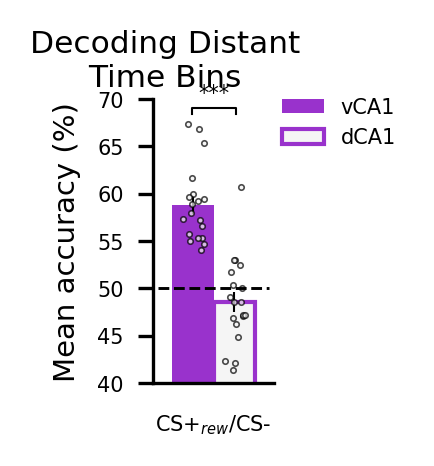

In [19]:
from matplotlib.patches import Patch
width = 0.38  # the width of the bars
loops = len(beyond2s_all_means_rwVScsm_vhpc['post'])
v={}
d={}
i=0
fig, ax = pl.subplots(1,1,figsize=(.9,1.3))
v['post'] = np.std(beyond2s_all_means_rwVScsm_vhpc['post'])/np.sqrt(loops-1)*100
ax.bar(i - width/2, np.mean(beyond2s_all_means_rwVScsm_vhpc['post'])*100, width,
          color='darkorchid', yerr = v['post'])
ax.scatter(i-width/2+np.random.random(loops)*width/2-width/4.5,np.array(beyond2s_all_means_rwVScsm_vhpc['post'])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
d['post'] = np.std(beyond2s_all_means_rwVScsm_dhpc['post'])/np.sqrt(loops-1)*100
ax.bar(i + width/2,  np.mean(beyond2s_all_means_rwVScsm_dhpc['post'])*100, width,
          color='whitesmoke', edgecolor='darkorchid' ,yerr = d['post'])
ax.scatter(i+width/2+np.random.random(loops)*width/2-width/4.5,np.array(beyond2s_all_means_rwVScsm_dhpc['post'])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
ax.hlines(50,-.5,.5, color='k', lw=.7, linestyles='dashed')
ax.set_ylabel('Mean accuracy (%)')
ax.set_xticks([0])
ax.set_xticklabels(['CS+$_{rew}$/CS-'])
ax.legend([Patch(facecolor='darkorchid'),Patch(facecolor='whitesmoke',edgecolor='darkorchid')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
ax.set_ylim(40,70)
pvs=[]
pvs.append(add_significance(ax, beyond2s_all_means_rwVScsm_vhpc['post'],beyond2s_all_means_rwVScsm_dhpc['post'],
                            -.2+i,0.2+i,69))
report_stats(beyond2s_all_means_rwVScsm_vhpc['post'],beyond2s_all_means_rwVScsm_dhpc['post'])
            #max(np.mean(mean_scores_gmin_tb_6_vhpc['post'][:loops])*100+v['post'],
            #    np.mean(mean_scores_gmin_tb_6_dhpc['post'][:loops])*100+d['post'])+6))
#pvs.append(sig_vs_chance(ax,beyond2s_all_means_rwVScsm_vhpc['post'],.5,-.2+i,
#           np.mean(beyond2s_all_means_rwVScsm_vhpc['post'])*100+v['post']+1,loops=loops,sig_func=None,colors='k'))
#pvs.append(sig_vs_chance(ax,beyond2s_all_means_rwVScsm_dhpc['post'],.5, .2+i,
#           np.mean(beyond2s_all_means_rwVScsm_dhpc['post'])*100+d['post']+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding Distant\nTime Bins',y=1.1,fontsize=7.5)
fig.tight_layout(h_pad=5)

fig.savefig('../figures/%s_decoding_distant_tbs_Late_CSmRw.pdf'%NOTEBOOK_NAME)

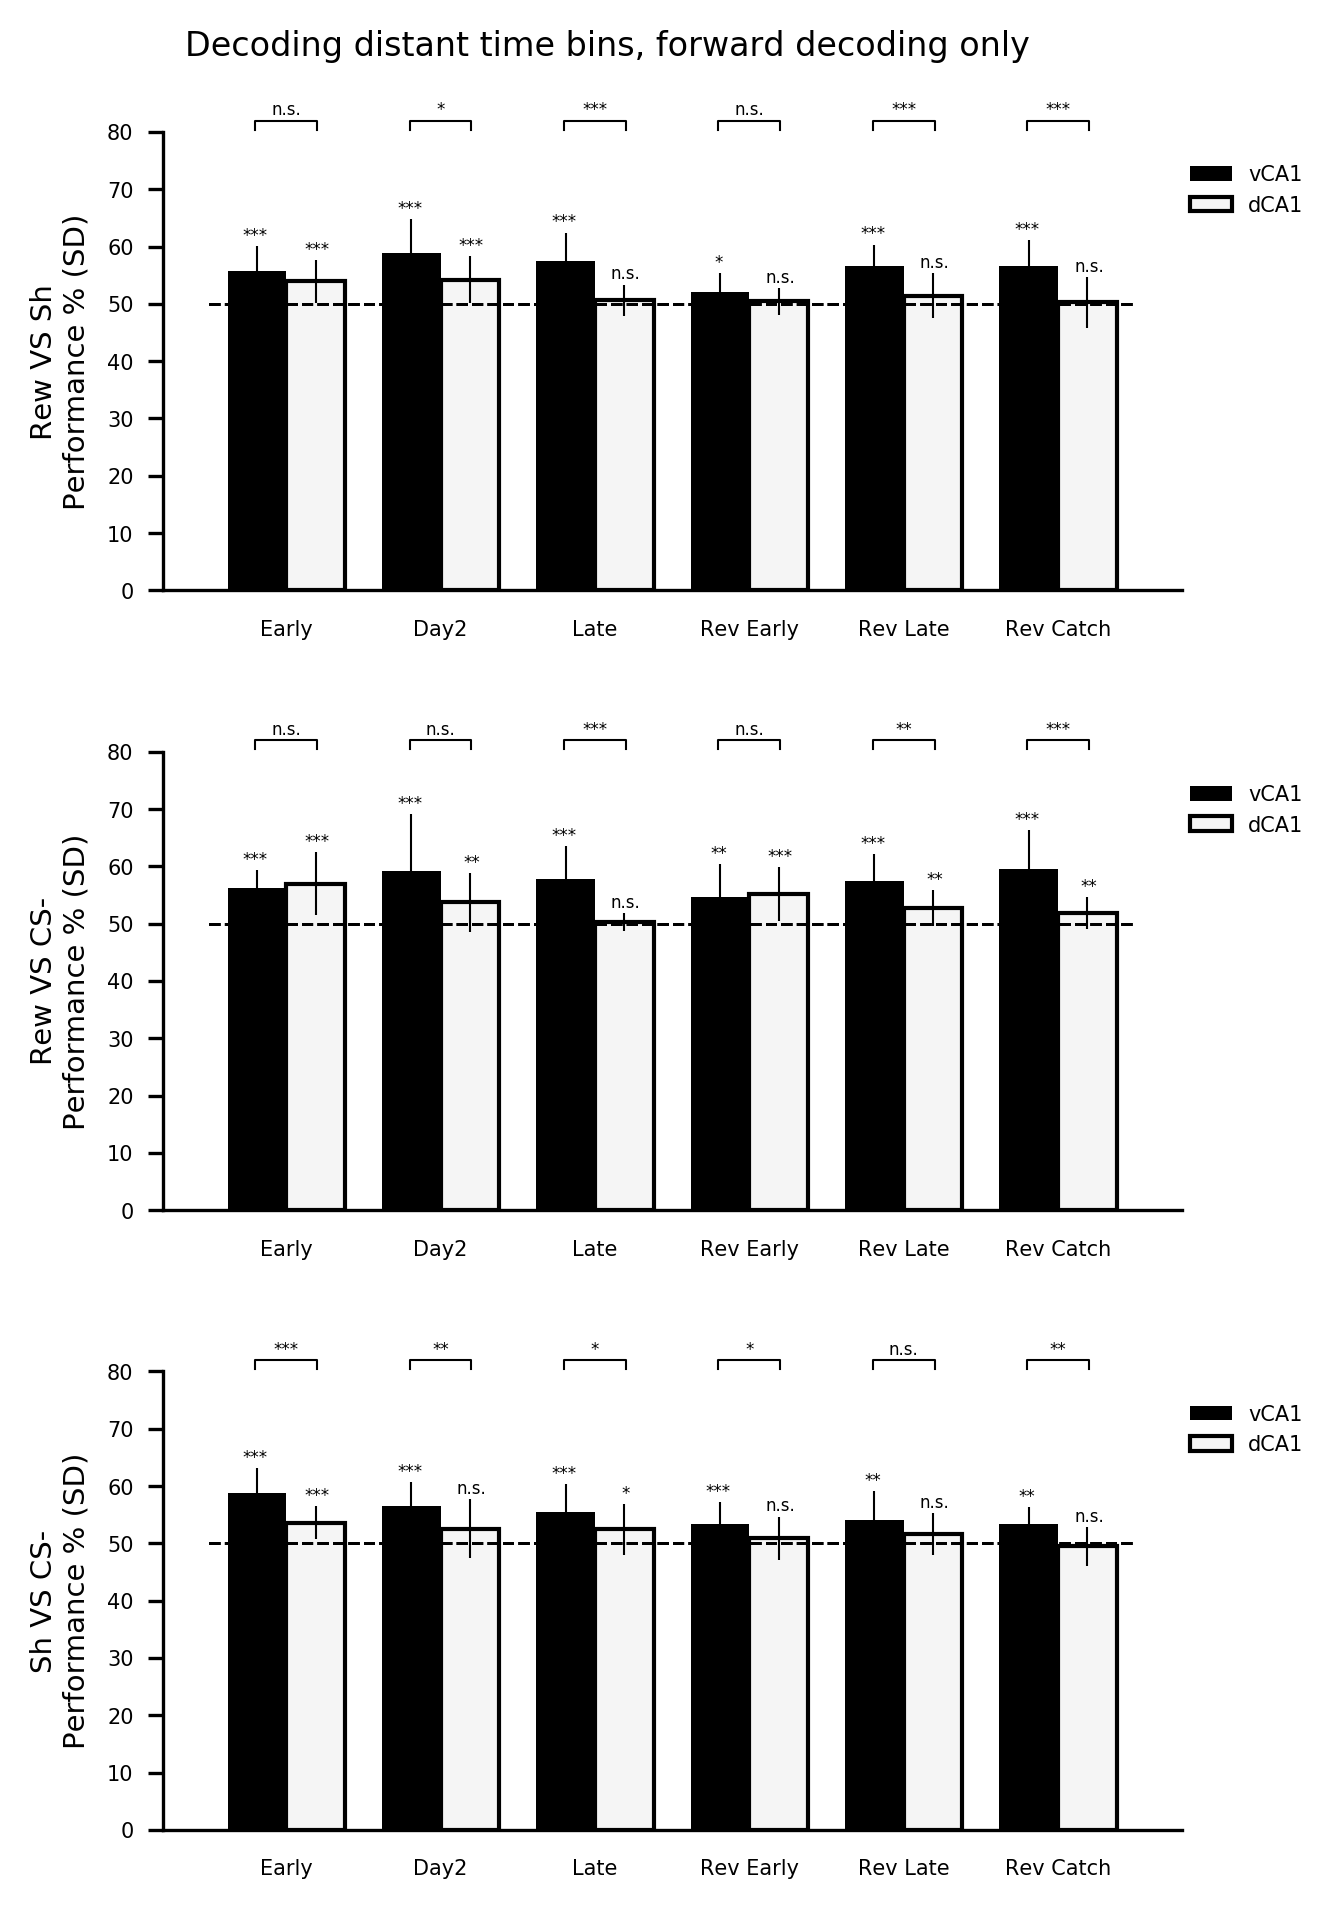

In [174]:
from matplotlib.patches import Patch
x = np.arange(len(sessions))  # the label locations
width = 0.38  # the width of the bars
loops = 10
for label in non_catch_labels:
    exec("v_%s={}"%label)
    exec("d_%s={}"%label)

fig, ax = pl.subplots(3,1,figsize=(4,6))
for sess,c,i in zip(sessions,['k','k','k','k','k','k'],range(len(sessions))):
    for label,r,la in zip(non_catch_labels,range(3),['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
        exec("v_%s[sess] = np.std(beyond2s_forward_means_%s_vhpc[sess])*100"%(label,label))
        ax[r].bar(i - width/2, np.mean(eval("beyond2s_forward_means_%s_vhpc[sess]"%label))*100, width,
                  color=c, yerr = eval("v_%s[sess]"%label))
        exec("d_%s[sess] = np.std(beyond2s_forward_means_%s_dhpc[sess])*100"%(label,label))
        ax[r].bar(i + width/2,  np.mean(eval("beyond2s_forward_means_%s_dhpc[sess]"%label))*100, width,
                  color='whitesmoke', edgecolor=c ,yerr = eval("d_%s[sess]"%label))
        ax[r].hlines(50,-.5,5.5, color='k', lw=.7, linestyles='dashed')
        ax[r].set_ylabel(la+'\nPerformance % (SD)')
        ax[r].set_xticks(x)
        ax[r].set_xticklabels(session_labels)
        ax[r].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
        ax[r].tick_params(axis='x',bottom=False)
        ax[r].set_ylim(0,80)
pvs=[]
for sess,i in zip(sessions, range(len(sessions))):
    for label,r in zip(non_catch_labels,range(3)):
        pvs.append(add_significance(ax[r], eval("beyond2s_forward_means_%s_vhpc[sess]"%label),
                                    eval("beyond2s_forward_means_%s_dhpc[sess]"%label),-.2+i,0.2+i,82))
            #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
            #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
        pvs.append(sig_vs_chance(ax[r],eval("beyond2s_forward_means_%s_vhpc[sess]"%label),.5,-.2+i,
                   np.mean(eval("beyond2s_forward_means_%s_vhpc[sess]"%label))*100+eval("v_%s[sess]"%label)+1,loops=loops,sig_func=None,colors='k'))
        pvs.append(sig_vs_chance(ax[r],eval("beyond2s_forward_means_%s_dhpc[sess]"%label),.5, .2+i,
                   np.mean(eval("beyond2s_forward_means_%s_dhpc[sess]"%label))*100+eval("d_%s[sess]"%label)+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding distant time bins, forward decoding only',y=1.04,fontsize=8)
fig.tight_layout(h_pad=5)

#fig.savefig('../img/%s_decodingUSfromCS_allsess.pdf'%NOTEBOOK_NAME)

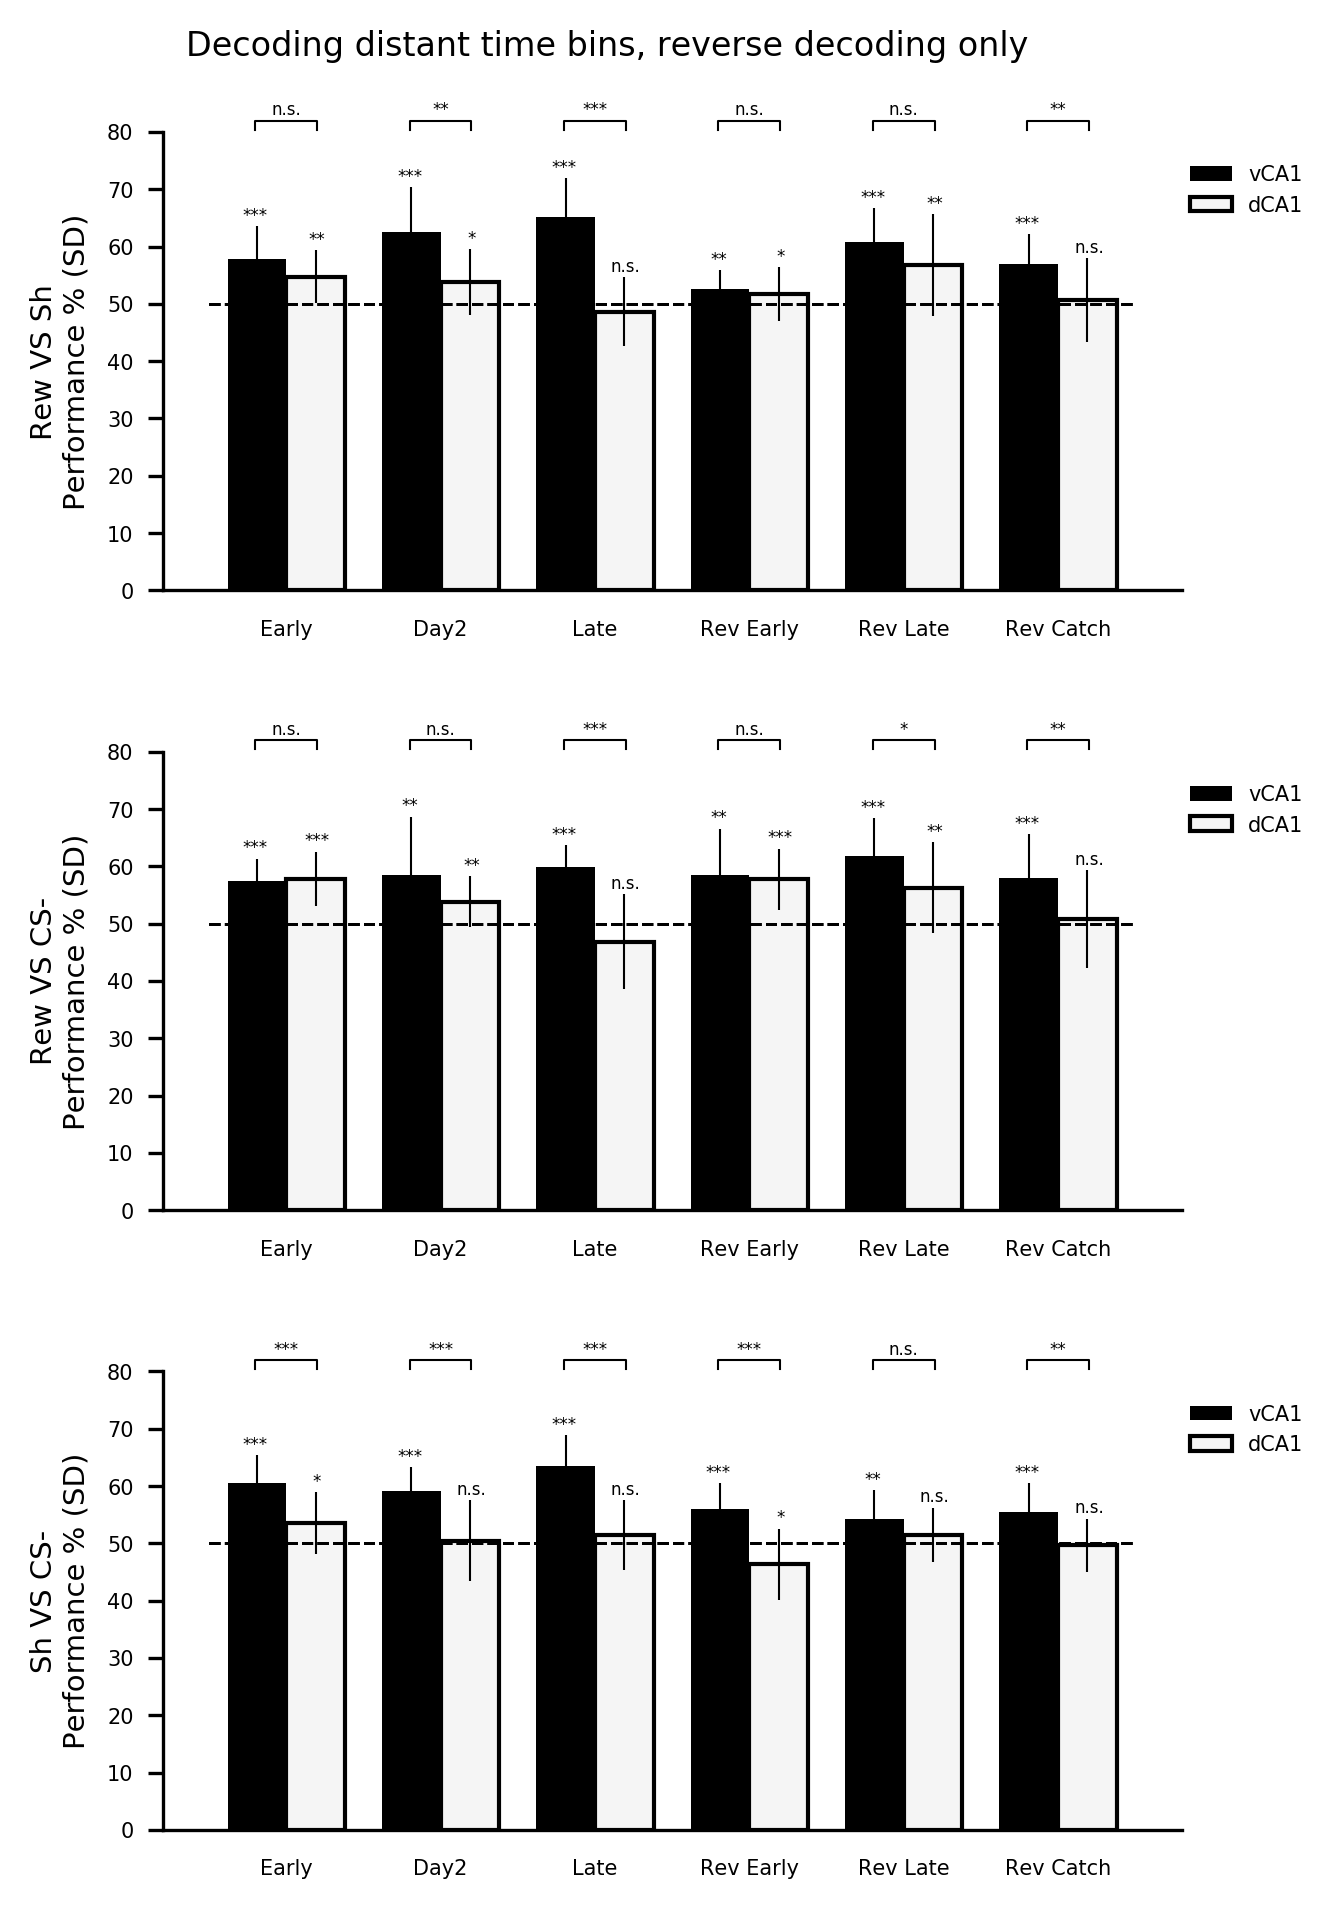

In [175]:
from matplotlib.patches import Patch
x = np.arange(len(sessions))  # the label locations
width = 0.38  # the width of the bars
loops = 10
for label in non_catch_labels:
    exec("v_%s={}"%label)
    exec("d_%s={}"%label)

fig, ax = pl.subplots(3,1,figsize=(4,6))
for sess,c,i in zip(sessions,['k','k','k','k','k','k'],range(len(sessions))):
    for label,r,la in zip(non_catch_labels,range(3),['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
        exec("v_%s[sess] = np.std(beyond2s_reverse_means_%s_vhpc[sess])*100"%(label,label))
        ax[r].bar(i - width/2, np.mean(eval("beyond2s_reverse_means_%s_vhpc[sess]"%label))*100, width,
                  color=c, yerr = eval("v_%s[sess]"%label))
        exec("d_%s[sess] = np.std(beyond2s_reverse_means_%s_dhpc[sess])*100"%(label,label))
        ax[r].bar(i + width/2,  np.mean(eval("beyond2s_reverse_means_%s_dhpc[sess]"%label))*100, width,
                  color='whitesmoke', edgecolor=c ,yerr = eval("d_%s[sess]"%label))
        ax[r].hlines(50,-.5,5.5, color='k', lw=.7, linestyles='dashed')
        ax[r].set_ylabel(la+'\nPerformance % (SD)')
        ax[r].set_xticks(x)
        ax[r].set_xticklabels(session_labels)
        ax[r].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
        ax[r].tick_params(axis='x',bottom=False)
        ax[r].set_ylim(0,80)
pvs=[]
for sess,i in zip(sessions, range(len(sessions))):
    for label,r in zip(non_catch_labels,range(3)):
        pvs.append(add_significance(ax[r], eval("beyond2s_reverse_means_%s_vhpc[sess]"%label),
                                    eval("beyond2s_reverse_means_%s_dhpc[sess]"%label),-.2+i,0.2+i,82))
            #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
            #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
        pvs.append(sig_vs_chance(ax[r],eval("beyond2s_reverse_means_%s_vhpc[sess]"%label),.5,-.2+i,
                   np.mean(eval("beyond2s_reverse_means_%s_vhpc[sess]"%label))*100+eval("v_%s[sess]"%label)+1,loops=loops,sig_func=None,colors='k'))
        pvs.append(sig_vs_chance(ax[r],eval("beyond2s_reverse_means_%s_dhpc[sess]"%label),.5, .2+i,
                   np.mean(eval("beyond2s_reverse_means_%s_dhpc[sess]"%label))*100+eval("d_%s[sess]"%label)+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding distant time bins, reverse decoding only',y=1.04,fontsize=8)
fig.tight_layout(h_pad=5)

#fig.savefig('../img/%s_decodingUSfromCS_allsess.pdf'%NOTEBOOK_NAME)

### below is when you average train/test and test/train runs together

In [54]:
for label in all_labels:
    for r in 'dhpc','vhpc':
        for t in range (13):
            for c in range (13):
                exec("scores_gmin_tb_distinct_%s_VS_%s_%s_%s = ut.load_variable('scores_gmin_tb_distinct_%s_VS_%s_%s',\
                    '../notebooks/autorestore/decoding_around_onset_combined_1sec_%s/')"%(t,c,label,r,t,c,label,r,))
                #exec("distinct_wilcox_%s_%s = ut.load_variable('distinct_wilcox_%s',\
                #    '../notebooks/autorestore/decoding_around_onset_combined_1sec_%s/')"%(label,r,label,r))

In [55]:
loops = 10
for t in range (13):
    for label in non_catch_labels:
        exec('distinct_mean%s_MannWhitney_dhpcVSvhpc_%s = {}'%(t,label))
for sess in sessions:
    for label in non_catch_labels:
        for t in range (13):
            exec("distinct_mean%s_MannWhitney_dhpcVSvhpc_%s['%s'] = []"%(t,label,sess))
            for c in range (13):
                eval('distinct_mean%s_MannWhitney_dhpcVSvhpc_%s'%(t,label))[sess].insert(c,
                      sstats.mannwhitneyu(eval('scores_gmin_tb_distinct_%s_VS_%s_%s_dhpc[sess].mean(1)[:loops]'%(t,c,label)),
                      eval('scores_gmin_tb_distinct_%s_VS_%s_%s_vhpc[sess][:,0][:loops]'%(t,c,label)), alternative='two-sided'))
            for x,i in zip(eval('distinct_mean%s_MannWhitney_dhpcVSvhpc_%s'%(t,label))[sess],range(len(eval('distinct_mean%s_MannWhitney_dhpcVSvhpc_%s'%(t,label))[sess]))):
                exec("distinct_mean%s_MannWhitney_dhpcVSvhpc_%s[sess][i] = x[-1]"%(t,label)) #only take p-values

In [56]:
for label in non_catch_labels:
    exec("distinct_mean_MannWhitney_dhpcVSvhpc_%s={}"%label)
    for sess in sessions:
        exec("distinct_mean_MannWhitney_dhpcVSvhpc_%s['%s']=(distinct_mean0_MannWhitney_dhpcVSvhpc_%s['%s'], distinct_mean1_MannWhitney_dhpcVSvhpc_%s['%s'], distinct_mean2_MannWhitney_dhpcVSvhpc_%s['%s'], distinct_mean3_MannWhitney_dhpcVSvhpc_%s['%s'],\
                          distinct_mean4_MannWhitney_dhpcVSvhpc_%s['%s'], distinct_mean5_MannWhitney_dhpcVSvhpc_%s['%s'], distinct_mean6_MannWhitney_dhpcVSvhpc_%s['%s'], distinct_mean7_MannWhitney_dhpcVSvhpc_%s['%s'],\
                          distinct_mean8_MannWhitney_dhpcVSvhpc_%s['%s'], distinct_mean9_MannWhitney_dhpcVSvhpc_%s['%s'], distinct_mean10_MannWhitney_dhpcVSvhpc_%s['%s'], distinct_mean11_MannWhitney_dhpcVSvhpc_%s['%s'],\
                          distinct_mean12_MannWhitney_dhpcVSvhpc_%s['%s'])"%(label,sess,label,sess,label,sess,label,sess,label,sess,label,sess,label,sess,label,sess,label,sess,
                                                                       label,sess,label,sess,label,sess,label,sess,label,sess,))
        exec("np.array([distinct_mean_MannWhitney_dhpcVSvhpc_%s['%s']])"%(label,sess))

In [57]:
import copy
for label in non_catch_labels:
    exec("distinct_mean_MannWhitney_dhpcVSvhpc_%s_to_plot = copy.deepcopy(distinct_mean_MannWhitney_dhpcVSvhpc_%s)"%(label,label))

In [58]:
#take log10 of sig time bins and assign sign for vhpc (-), or dhpc (+). Non significant data points are labeled 0
import math
for sess in sessions:
    for label in non_catch_labels:
        for i in range(len(eval("distinct_mean_%s_vhpc[sess]"%label))):
            for j in range(len(eval("distinct_mean_%s_vhpc[sess]"%label)[i])):
                exec("distinct_mean_MannWhitney_dhpcVSvhpc_%s_to_plot[sess][i][j]=0"%label)
                if eval("distinct_mean_%s_vhpc[sess][i][j]"%label) > eval("distinct_mean_%s_dhpc[sess][i][j]"%label) and eval("distinct_mean_MannWhitney_dhpcVSvhpc_%s[sess][i][j]"%label) < 0.05:
                    exec("distinct_mean_MannWhitney_dhpcVSvhpc_%s_to_plot[sess][i][j]= (math.log10(distinct_mean_MannWhitney_dhpcVSvhpc_%s[sess][i][j]))"%(label,label))
                if eval("distinct_mean_%s_vhpc[sess][i][j]"%label) < eval("distinct_mean_%s_dhpc[sess][i][j]"%label) and eval("distinct_mean_MannWhitney_dhpcVSvhpc_%s[sess][i][j]"%label) < 0.05:
                    exec("distinct_mean_MannWhitney_dhpcVSvhpc_%s_to_plot[sess][i][j]= -(math.log10(distinct_mean_MannWhitney_dhpcVSvhpc_%s[sess][i][j]))"%(label,label))
                #else:
                #    distinct_MannWhitney_dhpcVSvhpc_to_plot[sess][i][j]=0

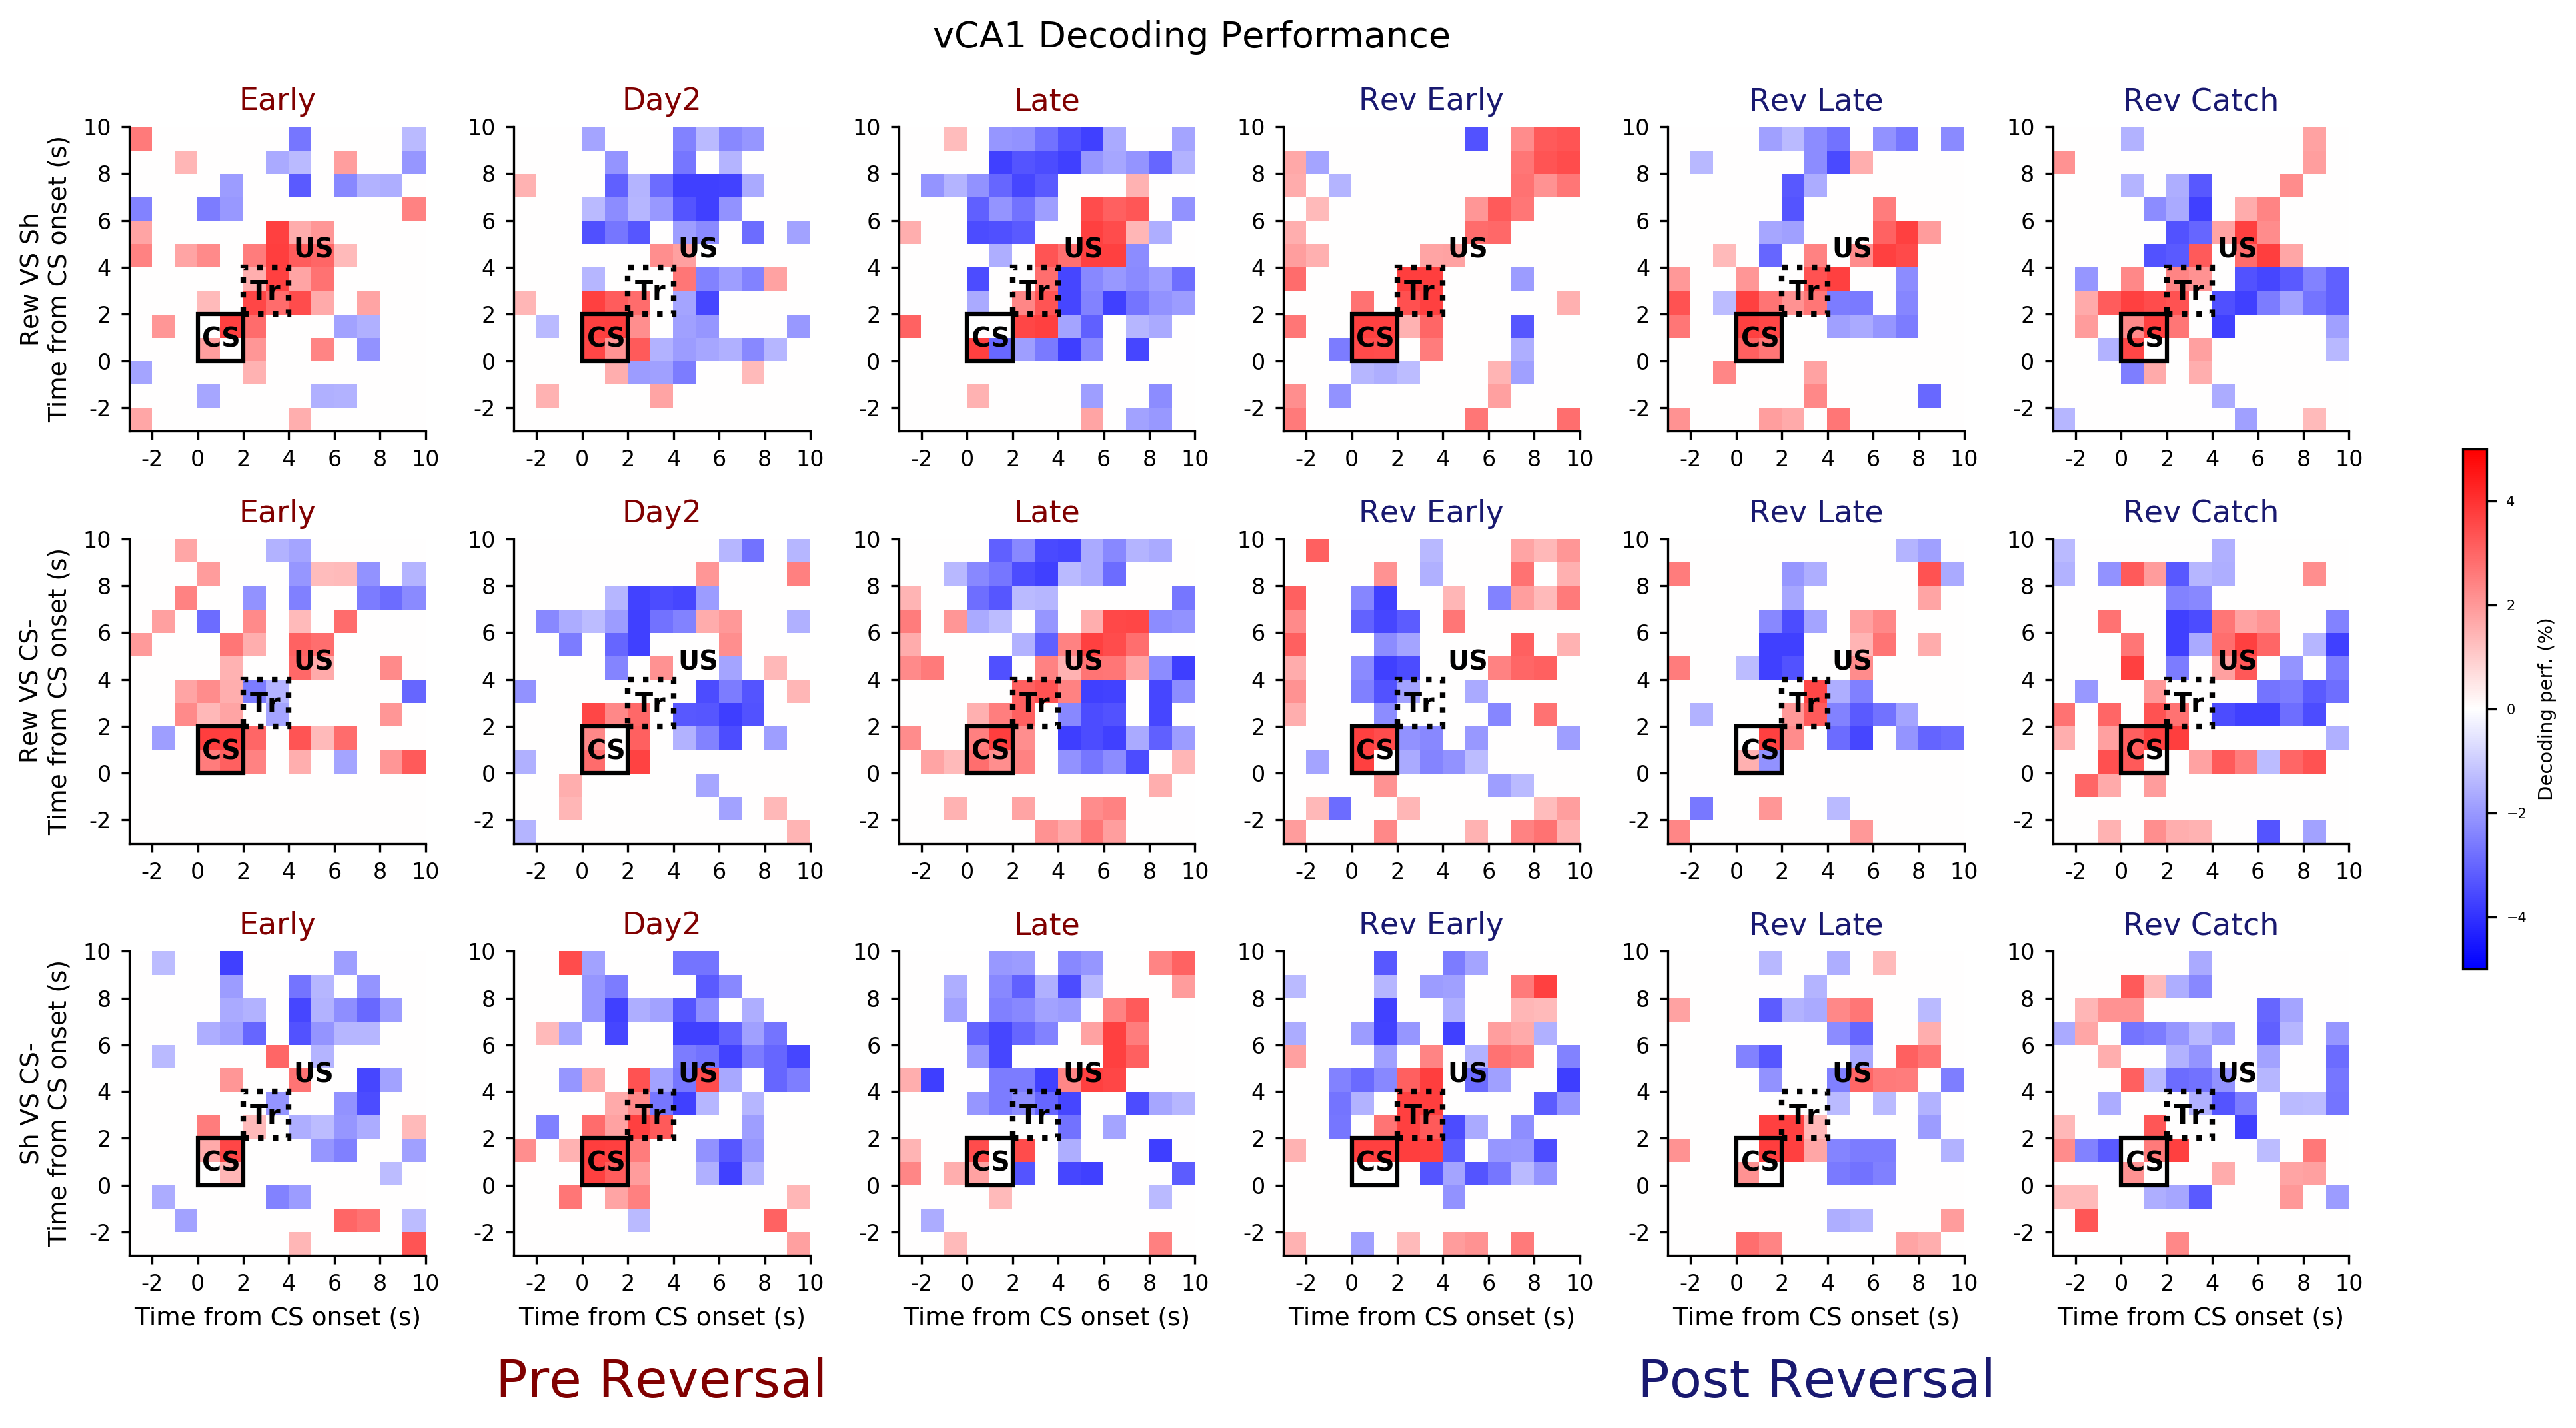

In [83]:
vmin=-5
vmax=5

fig, ax = pl.subplots(3, 6, figsize=(12, 6.5))#, sharex=True, sharey=True)

for label,c,lab in zip(non_catch_labels,range(3),['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
    for sess,x in zip(sessions,range(len(sessions))):
        im = ax[c][x].pcolormesh(eval("distinct_mean_MannWhitney_dhpcVSvhpc_%s_to_plot[sess]"%(label)),vmin=vmin,vmax=vmax,cmap='bwr')
        ax[c][x].set_xticks(np.arange(1,14,2))
        ax[c][x].set_yticks(np.arange(1,14,2))
        #ax[c][x].set_ylim(-.5, 12.5)
        #ax[c][x].set_xlim(-.5, 12.5)
        ax[c][x].set_xticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][x].set_yticklabels(['-2','0','2','4','6','8','10'],fontsize=8)
        ax[c][0].set_ylabel(lab+'\nTime from CS onset (s)', fontsize=9)
        ax[2][x].set_xlabel('Time from CS onset (s)', fontsize=9)
        ax[c][x].set_title(session_labels[x],fontsize=11,color=session_colors[x])
        ax[c][x].tick_params(length=3)
# Add the patch to the Axes
for x in range(6):
    for c in range(3):
        CS = patches.Rectangle((3,3),2,2,linewidth=1.5,edgecolor='k',facecolor='none')
        Tr = patches.Rectangle((5,5),2,2,linewidth=2,edgecolor='k',facecolor='none',linestyle=':')
        ax[c][x].add_patch(CS)
        ax[c][x].add_patch(Tr)
        ax[c][x].text(3.2,3.6,"CS",fontsize=9.5, weight='bold',color='k')
        ax[c][x].text(5.3,5.6,"Tr",fontsize=9.5, weight='bold',color='k')
        ax[c][x].text(7.2,7.4,"US",fontsize=9.5, weight='bold',color='k')

pl.suptitle('vCA1 Decoding Performance',y=1.03,fontsize=13)

fig.text(x=.21,y=-0.03,s='Pre Reversal',fontsize=19, color='maroon')
fig.text(x=.686,y=-0.03,s='Post Reversal',fontsize=19, color='midnightblue')

cax = fig.add_axes([1.03,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='Decoding perf. (%)')
fig.tight_layout(pad=2)
#fig.savefig('../figures/%s_gmin_across_bins_v.pdf'%NOTEBOOK_NAME)

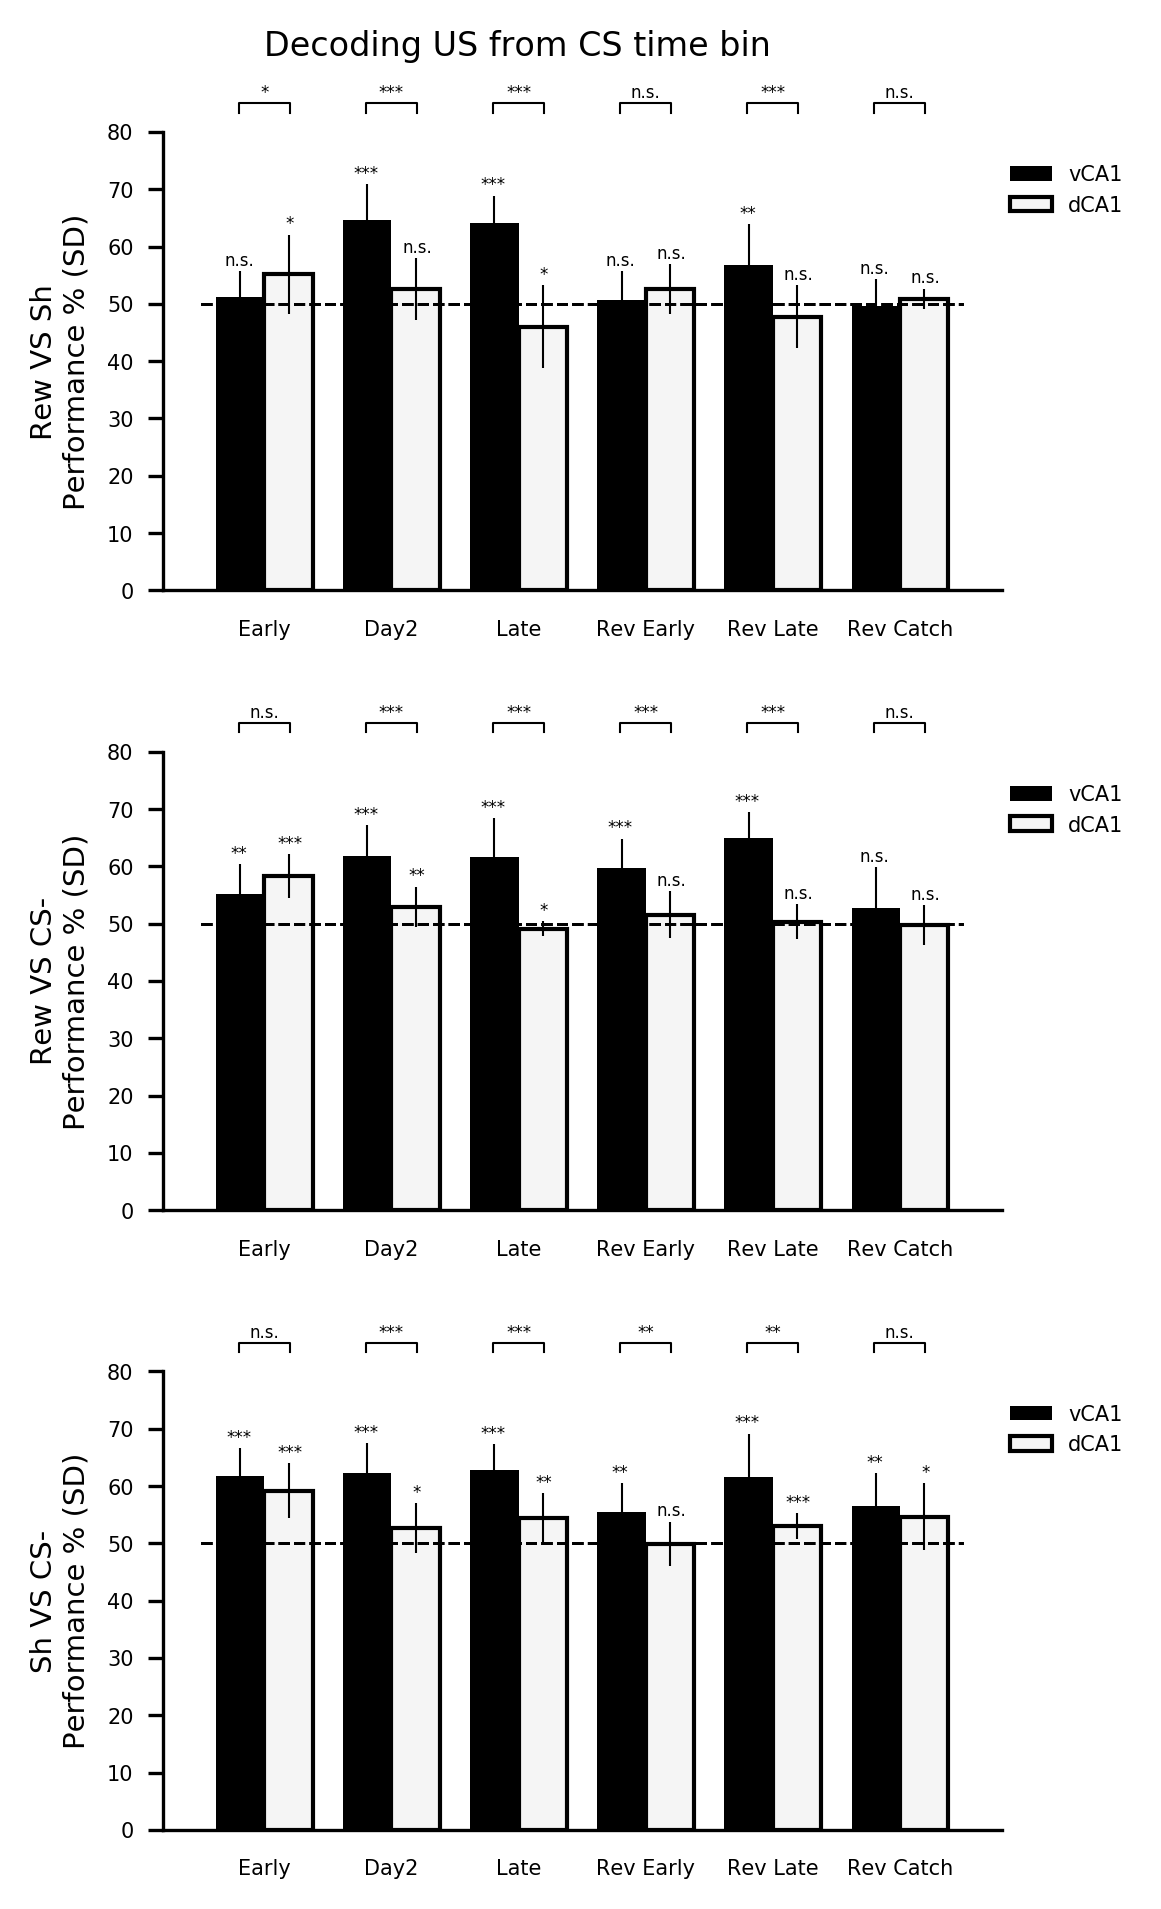

In [64]:
from matplotlib.patches import Patch
x = np.arange(len(sessions))  # the label locations
width = 0.38  # the width of the bars
loops = 15
for label in non_catch_labels:
    exec("v_%s={}"%label)
    exec("d_%s={}"%label)

fig, ax = pl.subplots(3,1,figsize=(3.4,6))
for sess,c,i in zip(sessions,['k','k','k','k','k','k'],range(len(sessions))):
    for label,r,la in zip(non_catch_labels,range(3),['Rew VS Sh','Rew VS CS-','Sh VS CS-']):
        exec("v_%s[sess] = np.array(np.std(scores_gmin_tb_distinct_4_VS_8_%s_vhpc[sess].mean(1)[:loops]*100))"%(label,label))
        ax[r].bar(i - width/2, np.mean(eval("scores_gmin_tb_distinct_4_VS_8_%s_vhpc[sess][:loops].mean()"%label))*100, width,
                  color=c, yerr = eval("v_%s[sess]"%label))
        exec("d_%s[sess] = np.array(np.std(scores_gmin_tb_distinct_4_VS_8_%s_dhpc[sess].mean(1)[:loops]*100))"%(label,label))
        ax[r].bar(i + width/2,  np.mean(eval("scores_gmin_tb_distinct_4_VS_8_%s_dhpc[sess][:loops].mean()"%label))*100, width,
                  color='whitesmoke', edgecolor=c ,yerr = eval("d_%s[sess]"%label))
        ax[r].hlines(50,-.5,5.5, color='k', lw=.7, linestyles='dashed')
        ax[r].set_ylabel(la+'\nPerformance % (SD)')
        ax[r].set_xticks(x)
        ax[r].set_xticklabels(session_labels)
        ax[r].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
        ax[r].tick_params(axis='x',bottom=False)
        ax[r].set_ylim(0,80)
pvs=[]
for sess,i in zip(sessions, range(len(sessions))):
    for label,r in zip(non_catch_labels,range(3)):
        pvs.append(add_significance(ax[r], eval("scores_gmin_tb_distinct_4_VS_8_%s_vhpc[sess].mean(1)[:loops]"%label),
                                    eval("scores_gmin_tb_distinct_4_VS_8_%s_dhpc[sess].mean(1)[:loops]"%label),-.2+i,0.2+i,85))
            #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
            #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
        pvs.append(sig_vs_chance(ax[r],eval("scores_gmin_tb_distinct_4_VS_8_%s_vhpc[sess].mean(1)[:loops]"%label),.5,-.2+i,
                   np.mean(eval("scores_gmin_tb_distinct_4_VS_8_%s_vhpc[sess][:loops]"%label).mean())*100+eval("v_%s[sess]"%label)+1,loops=loops,sig_func=None,colors='k'))
        pvs.append(sig_vs_chance(ax[r],eval("scores_gmin_tb_distinct_4_VS_8_%s_dhpc[sess].mean(1)[:loops]"%label),.5, .2+i,
                   np.mean(eval("scores_gmin_tb_distinct_4_VS_8_%s_dhpc[sess][:loops]"%label).mean())*100+eval("d_%s[sess]"%label)+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding US from CS time bin',y=1.04,fontsize=8)
fig.tight_layout(h_pad=5)

fig.savefig('../img/%s_decodingUSfromCS_allsessANDlabels.pdf'%NOTEBOOK_NAME)

In [176]:
save_workspace(db)

Could not store variable 'patches'. Skipping...
Could not store variable 'math'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'copy'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'matplotlib'. Skipping...
Could not store variable 'cm'. Skipping...
